In [2]:
import tables
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.zeros((30,0))
vertex = np.zeros((3,0))
for i in np.arange(500):
    h = tables.open_file('file%d.h5' % (i+1))
    if(np.size(h.root.mean)/30 == np.size(h.root.vertex[:])/3):
        data = np.hstack((data, h.root.mean[:].T))
        vertex = np.hstack((vertex, h.root.vertex[:].T))
    else:
        print(i+1)
    h.close()
    
vertex = vertex.T
data = data.T

OSError: ``file1.h5`` does not exist

In [4]:
v = np.zeros_like(vertex)
v[:,0] = np.sqrt(np.sum(vertex**2,axis=1))/1000
v[:,1] = np.arccos(vertex[:,2]/1000/(v[:,0]+1e-6))
v[:,2] = np.arctan(vertex[:,1]/(vertex[:,0]+1e-6)) + (vertex[:,0]<0)*np.pi

IndexError: index 0 is out of bounds for axis 1 with size 0

In [5]:
plt.hist(v[:,0], bins = 100)
plt.show()
plt.hist(v[:,1], bins = 100)
plt.show()
plt.hist(v[:,2], bins = 100)
plt.show()

IndexError: index 0 is out of bounds for axis 1 with size 0

In [6]:
plt.hist(v[:,0]**3, bins = 100)
plt.show()
plt.hist(np.cos(v[:,1]), bins = 100)
plt.show()
plt.hist(v[:,2], bins = 100)
plt.show()

IndexError: index 0 is out of bounds for axis 1 with size 0

In [7]:
N = 30
H_r, edges_r = np.histogram(v[:,0]**3, bins = N)
H_t, edges_t = np.histogram(np.cos(v[:,1]), bins = N)
H_p, edges_p = np.histogram(v[:,2], bins = N)

IndexError: index 0 is out of bounds for axis 1 with size 0

In [8]:
bins = np.zeros((N**3, 3))
mean = np.zeros((N**3, 30))
cnt = 0
for i1, i in enumerate(edges_r[0:-1]):
    for j1, j in enumerate(edges_t[0:-1]):
        for k1, k in enumerate(edges_p[0:-1]):
            bins[cnt:] = np.array((i,j,k))
            cnt = cnt + 1
            index = (v[:,0]**3>edges_r[i1]) & (v[:,0]**3<edges_r[i1+1]) & \
                (np.cos(v[:,1])>edges_t[j1]) & (np.cos(v[:,1])<edges_t[j1+1]) & \
                (v[:,2]>edges_p[k1]) & (v[:,2]<edges_p[k1+1])
            mean[cnt,:] = np.mean(data[index],axis=0)

NameError: name 'edges_r' is not defined

In [66]:
print(data.shape)
print(vertex.shape)
print(v.shape)

(30, 9467432)
(9467772, 3)
(9467772, 3)


In [9]:
pe = 0
N = 0
for i in np.arange(50):
    h = tables.open_file('hist%d.h5' % (i+1))
    
    mean = h.root.mean[:]
    vertex = h.root.vertex[:]
    
    pe = pe + mean[:,0:-1]
    N = N + mean[:,-1]
    h.close()
    
total = (pe.T/N).T
print(total.shape)

with h5py.File('total.h5','w') as out:   
    out.create_dataset('mean', data = total)
    out.create_dataset('vertex', data = vertex)

OSError: ``hist1.h5`` does not exist

[[1.81578947 1.96783626 2.01169591 ... 2.35087719 2.35964912 2.6754386 ]
 [1.88059701 1.81791045 1.84179104 ... 2.35223881 2.29850746 2.68955224]
 [1.83183183 1.84384384 1.85885886 ... 2.77477477 2.34534535 2.71471471]
 ...
 [0.18209877 0.58641975 1.2962963  ... 0.95061728 0.89506173 1.17592593]
 [0.15506329 1.31962025 1.29746835 ... 0.91139241 0.83227848 1.11075949]
 [0.16052632 2.73157895 1.16842105 ... 0.85526316 0.88157895 1.04736842]]


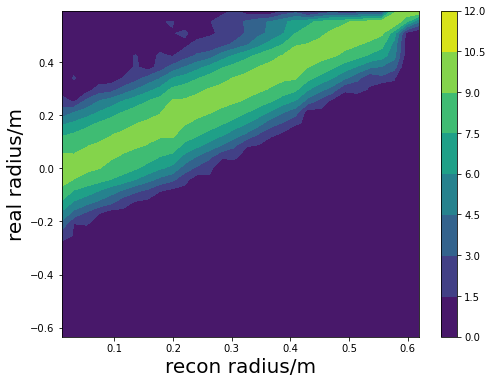

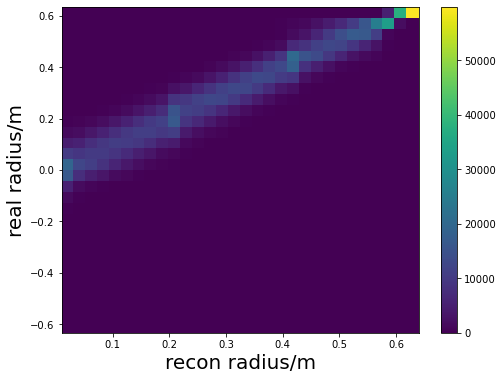

In [12]:
import tables
import numpy as np
import h5py

r = np.arange(0.01, 0.65, 0.01)
ra = []
data = []
sign = '+'
axis = 'x'
for radius in r:
    h1 = tables.open_file("./MCmean/file%s%s%.3f.h5" % (sign,axis,radius))
    try:
        a = h1.root.result[:]
        data.append(a)
        ra.append(radius)
    except:
        print(radius)
        pass
    h1.close()

real = []
recon = np.zeros((3,0))
for index, x in enumerate(ra):
    real = np.hstack((real, ra[index] * np.ones(np.size(data[index][:,0]))))
    recon = np.hstack((recon, data[index].T))
    
import matplotlib.pyplot as plt

H, xedges, yedges = np.histogram2d(real, recon[0,:], bins=30)
plt.figure(figsize=(8,6))
plt.contourf(xedges[0:-1], yedges[0:-1], np.log(np.nan_to_num(H)+1).T)
plt.xlabel('recon radius/m',fontsize=20)
plt.ylabel('real radius/m', fontsize=20)
plt.colorbar()
plt.show()
plt.figure(figsize=(8,6))
plt.hist2d(real, recon[0,:], bins=30)
plt.xlabel('recon radius/m',fontsize=20)
plt.ylabel('real radius/m', fontsize=20)
plt.colorbar()
plt.show()

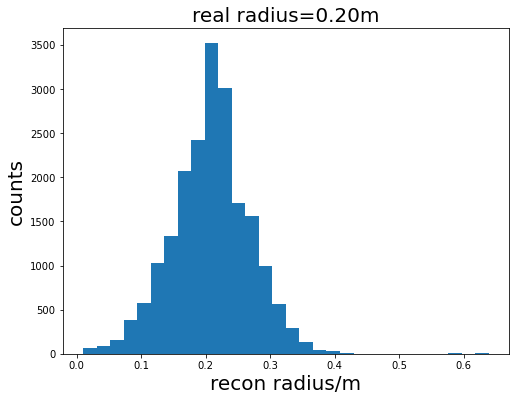

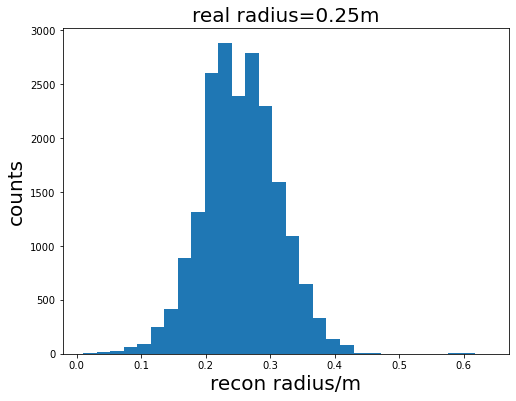

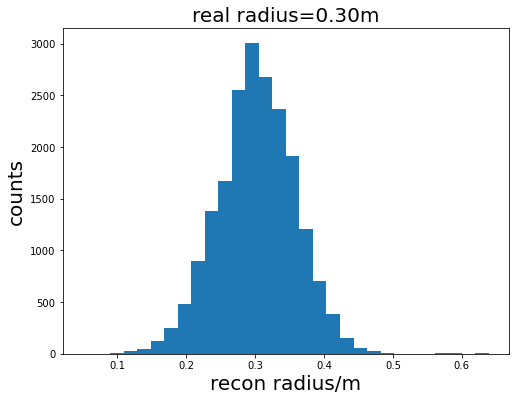

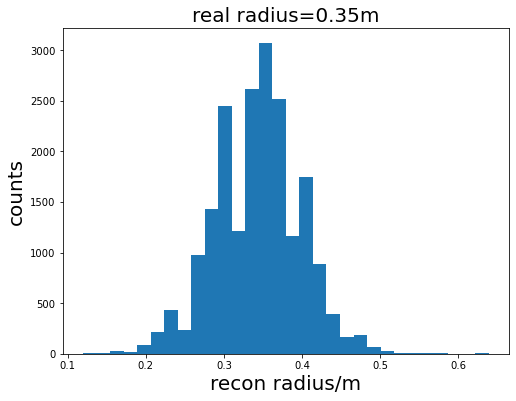

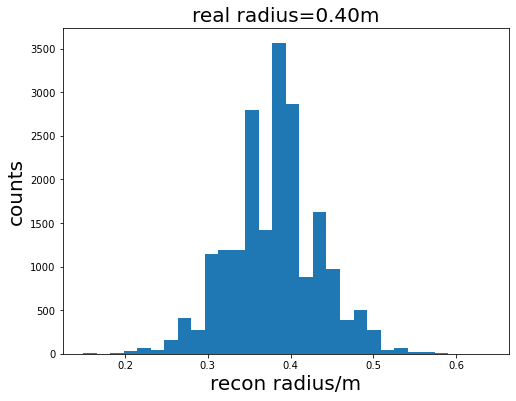

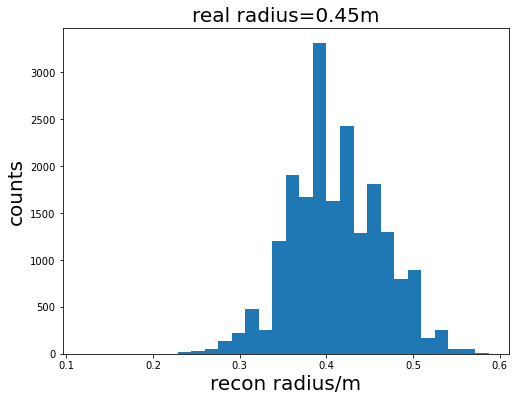

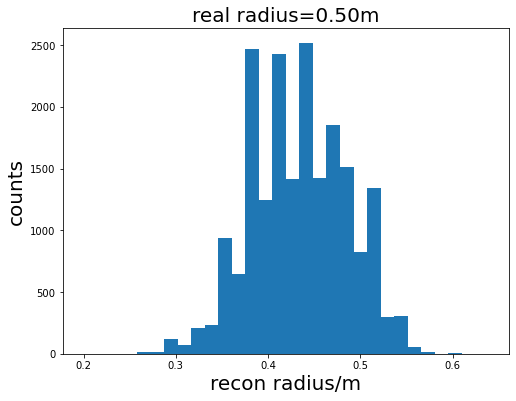

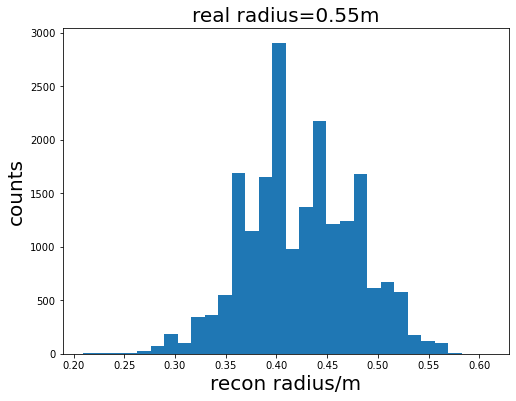

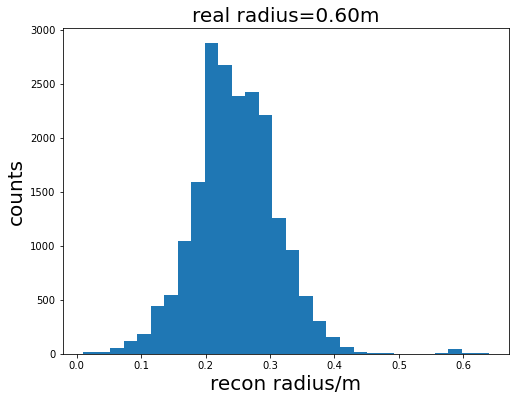

In [17]:
import tables
import numpy as np
import h5py

r = np.arange(0.01, 0.65, 0.01)
ra = []
data = []
sign = '+'
axis = 'z'
for radius in r:
    h1 = tables.open_file("./MCmean/file%s%s%.3f.h5" % (sign,axis,radius))
    try:
        a = h1.root.result[:]
        data.append(a)
        ra.append(radius)
    except:
        print(radius)
        pass
    h1.close()

real = []
recon = np.zeros((3,0))
for index, x in enumerate(ra):
    real = np.hstack((real, ra[index] * np.ones(np.size(data[index][:,0]))))
    recon = np.hstack((recon, data[index].T))
    
import matplotlib.pyplot as plt

for i in np.arange(0.2,0.65,0.05):
    index = np.where((r-i)==np.min(np.abs(r-i)))
    plt.figure(figsize=(8, 6))
    plt.hist(np.sqrt(np.sum(data[index[0][0]]**2, axis=1)),bins=30)
    plt.title('real radius=%.2fm' % i, fontsize=20)
    plt.xlabel('recon radius/m', fontsize=20)
    plt.ylabel('counts', fontsize=20)
    plt.show()

/mnt/stage/douwei/Simulation/1t_root/ground_axis/1t_+0.600_zQ.h5
/mnt/stage/douwei/Simulation/1t_root/ground_axis/1t_+0.600_z_1Q.h5
/mnt/stage/douwei/Simulation/1t_root/ground_axis/1t_+0.600_z_2Q.h5
total event: 19960
[2. 8. 4. ... 2. 0. 2.]
preprocessing 0-th event


<ipython-input-84-c5bd2952f96a>:134: RuntimeWarning: divide by zero encountered in log
  L = np.nansum(-corr + np.log(corr)*event_pe, axis=1)
<ipython-input-84-c5bd2952f96a>:134: RuntimeWarning: invalid value encountered in multiply
  L = np.nansum(-corr + np.log(corr)*event_pe, axis=1)
<ipython-input-84-c5bd2952f96a>:134: RuntimeWarning: divide by zero encountered in log
  L = np.nansum(-corr + np.log(corr)*event_pe, axis=1)
<ipython-input-84-c5bd2952f96a>:134: RuntimeWarning: invalid value encountered in multiply
  L = np.nansum(-corr + np.log(corr)*event_pe, axis=1)
<ipython-input-84-c5bd2952f96a>:134: RuntimeWarning: divide by zero encountered in log
  L = np.nansum(-corr + np.log(corr)*event_pe, axis=1)
<ipython-input-84-c5bd2952f96a>:134: RuntimeWarning: invalid value encountered in multiply
  L = np.nansum(-corr + np.log(corr)*event_pe, axis=1)
<ipython-input-84-c5bd2952f96a>:134: RuntimeWarning: divide by zero encountered in log
  L = np.nansum(-corr + np.log(corr)*event_pe, ax

NameError: name 'haha' is not defined

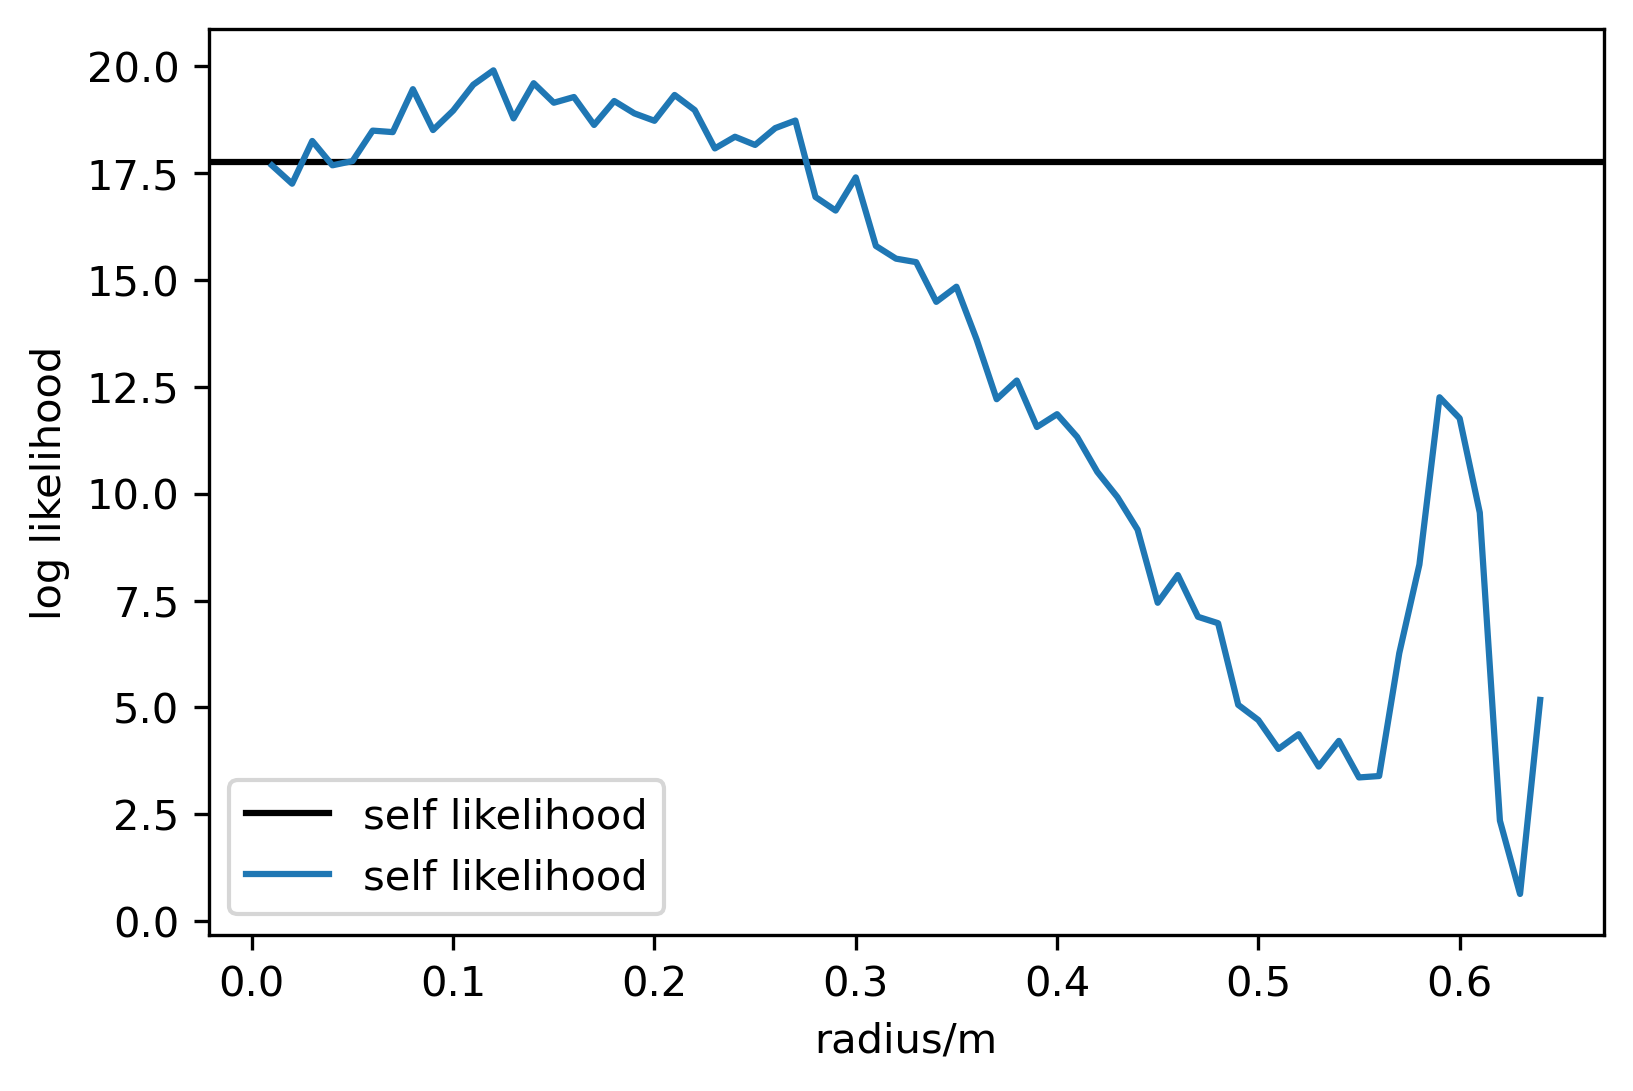

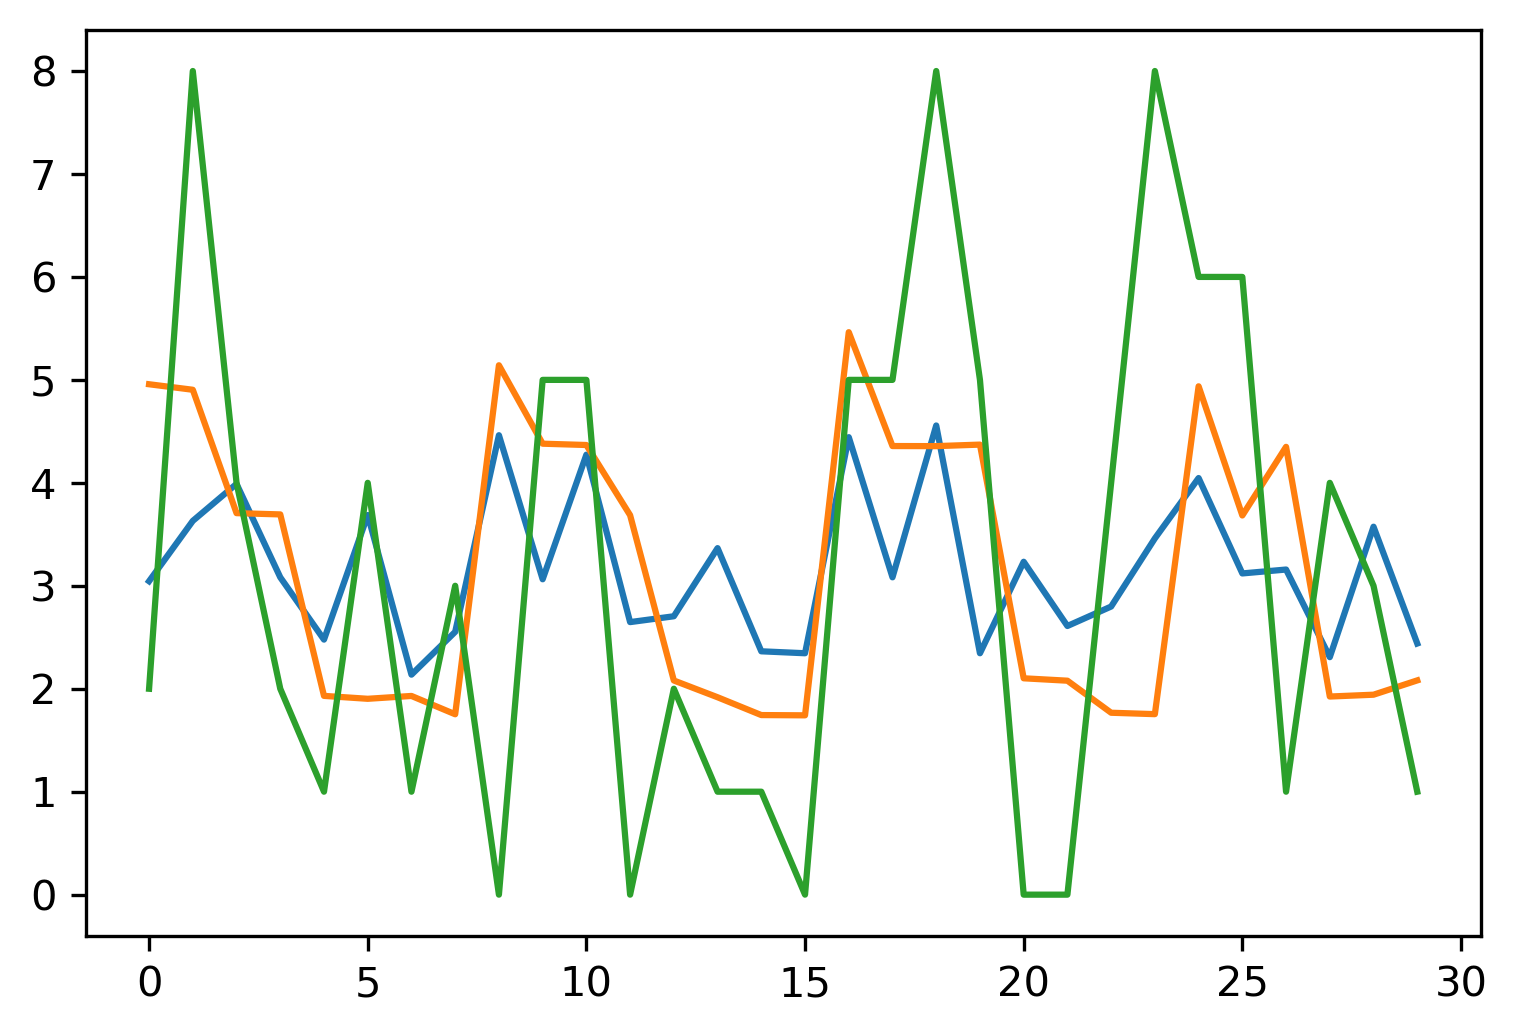

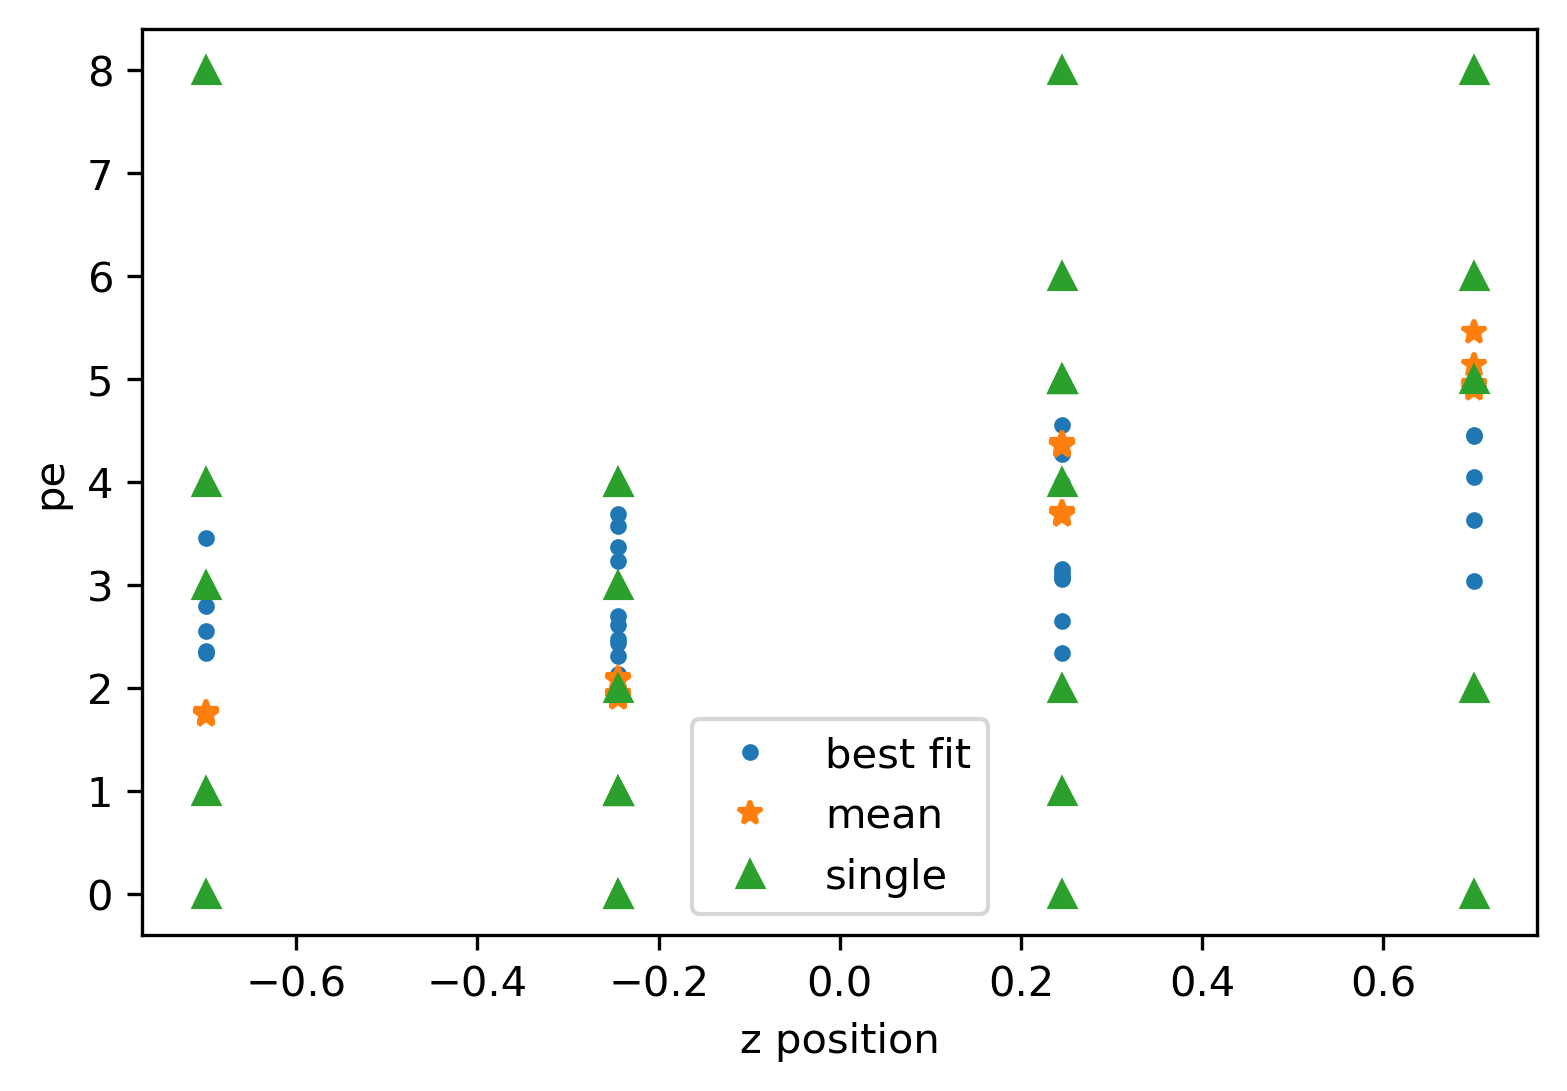

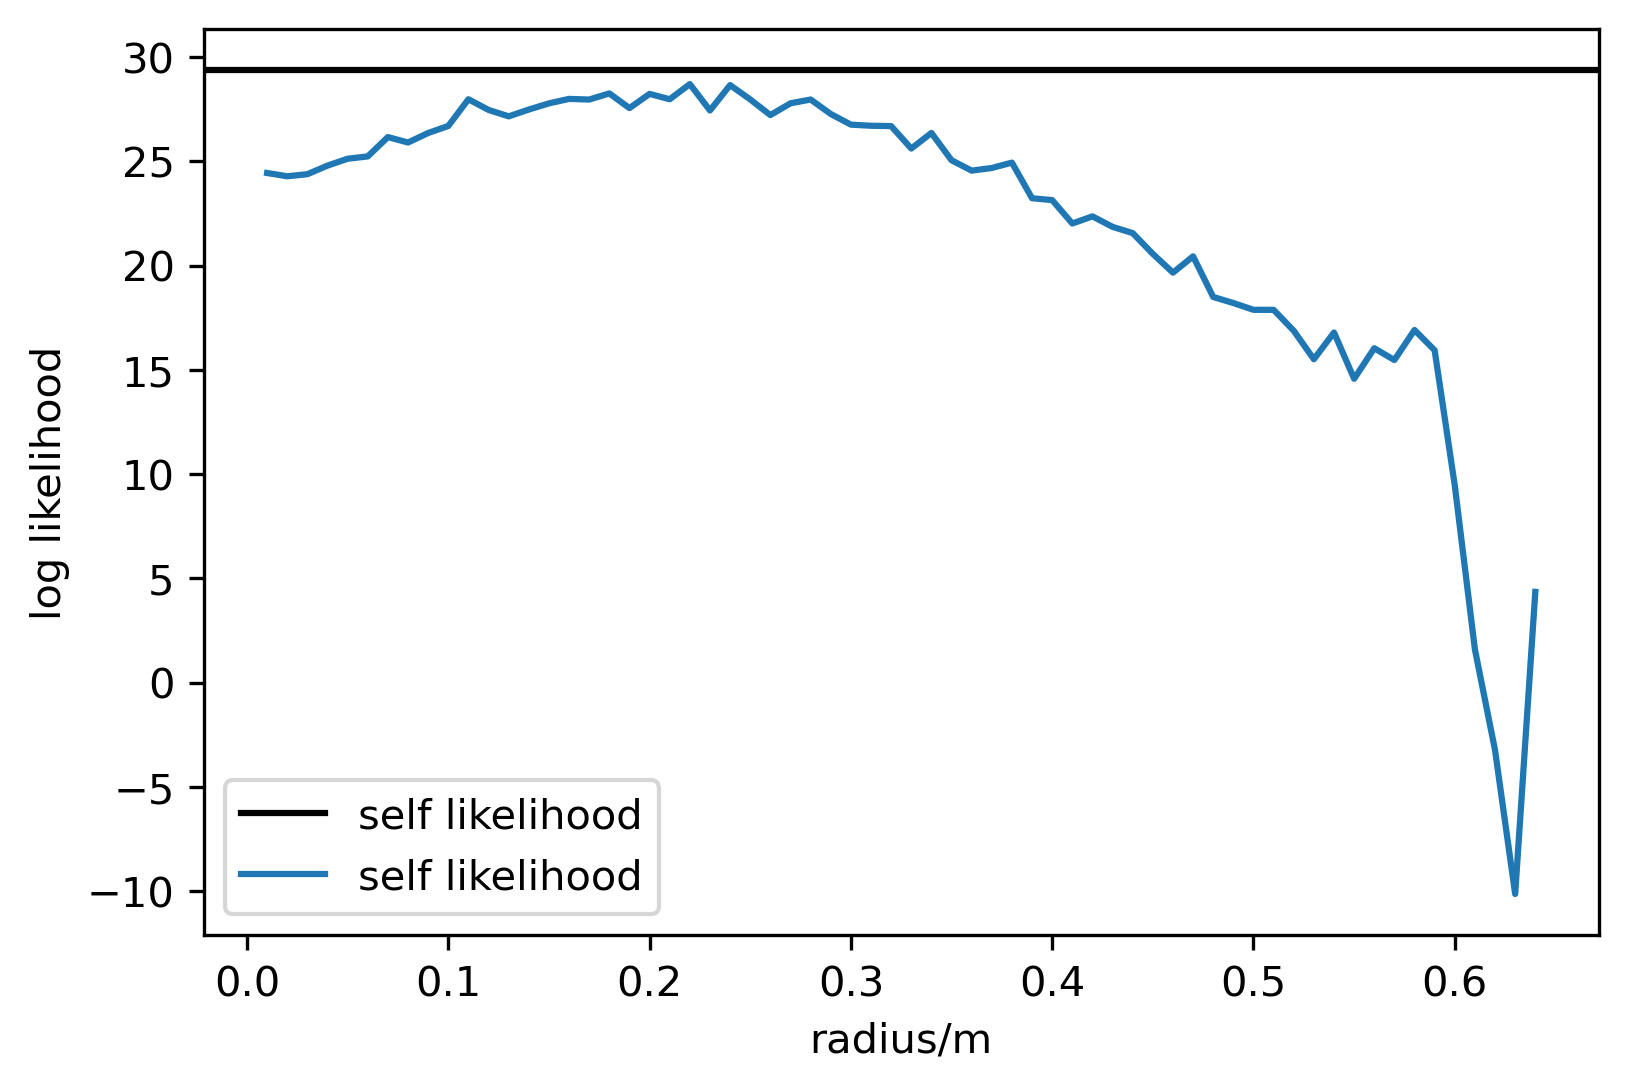

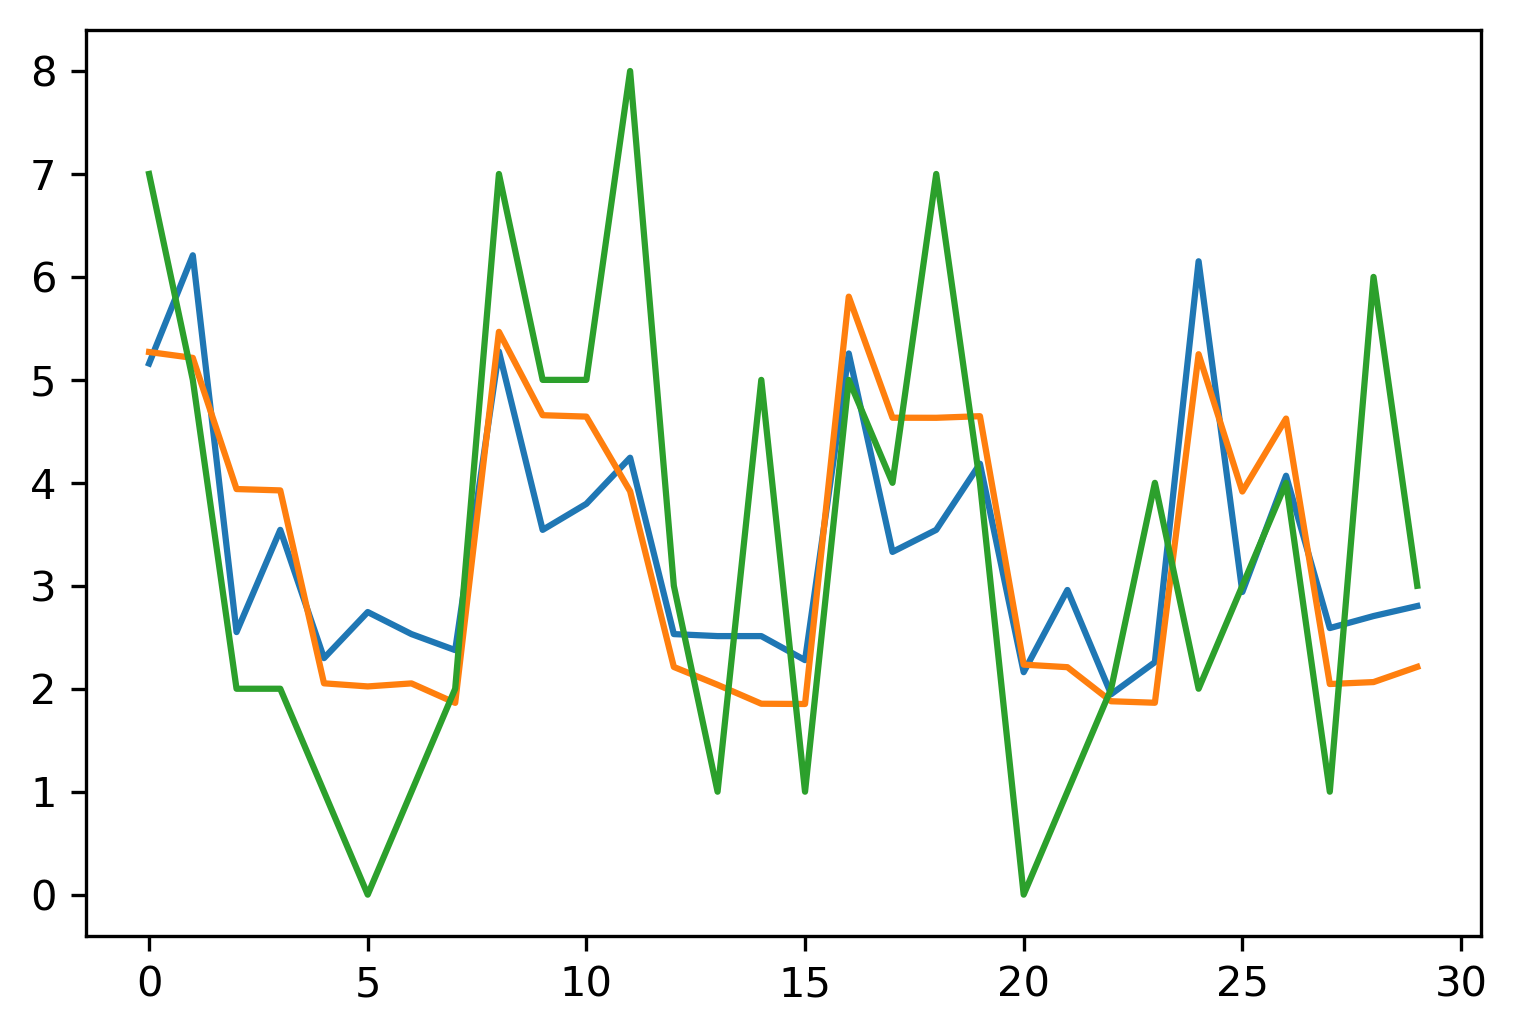

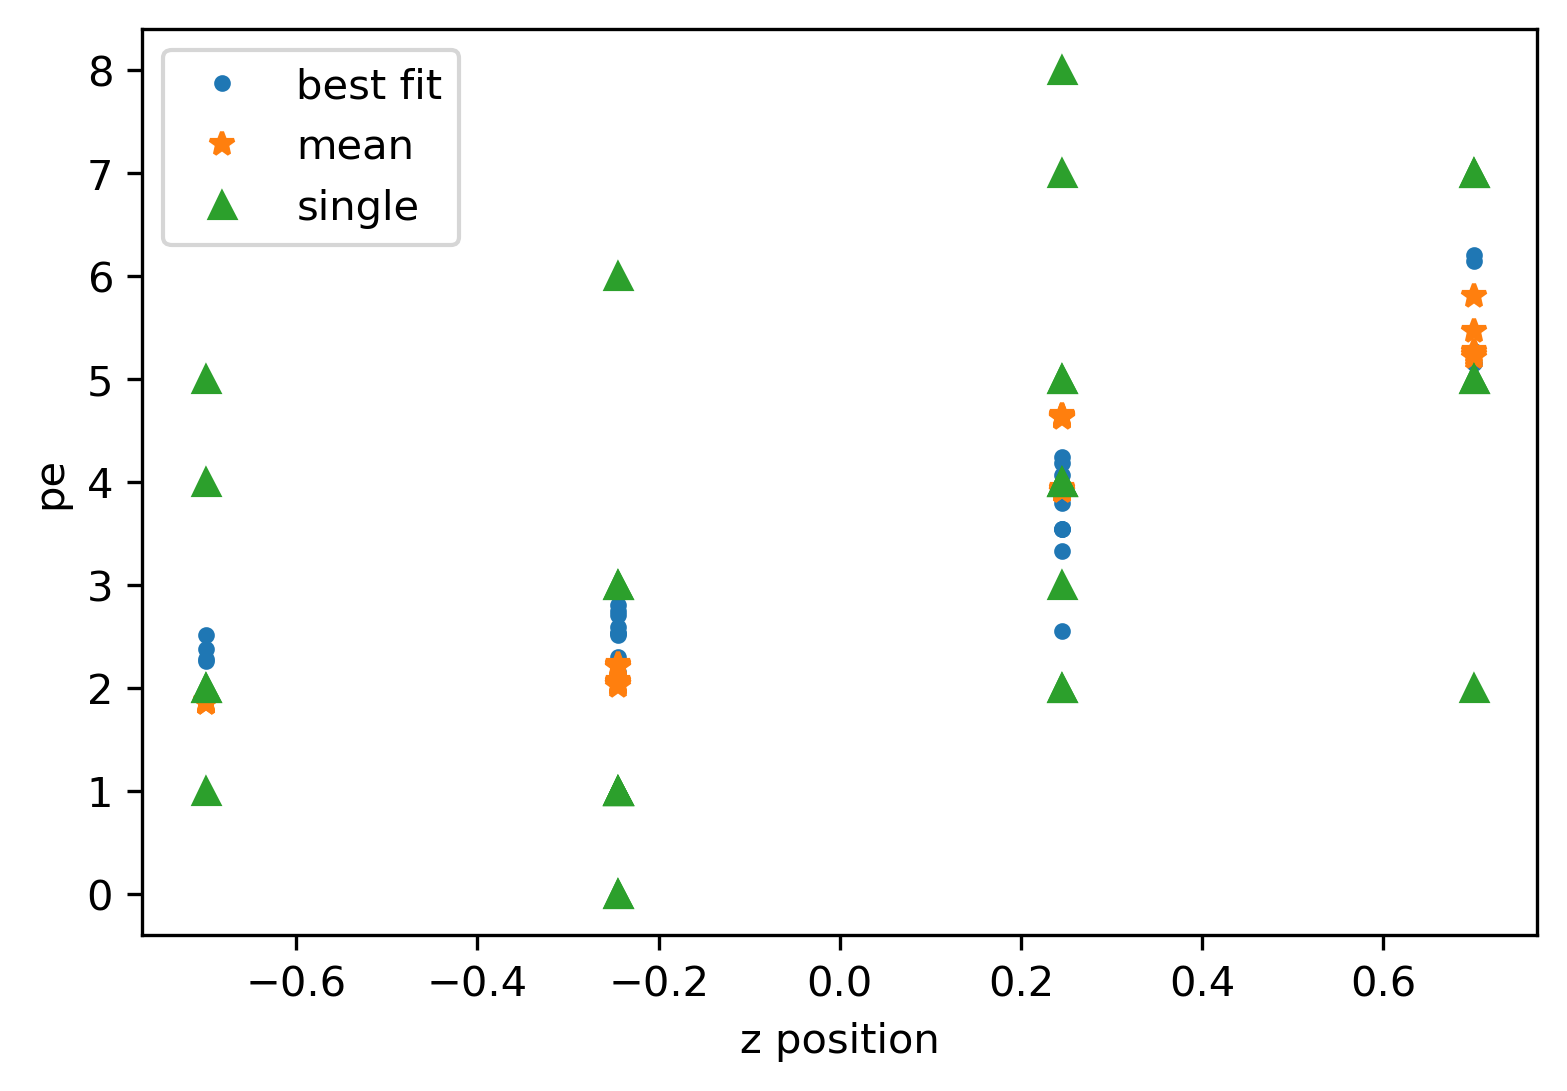

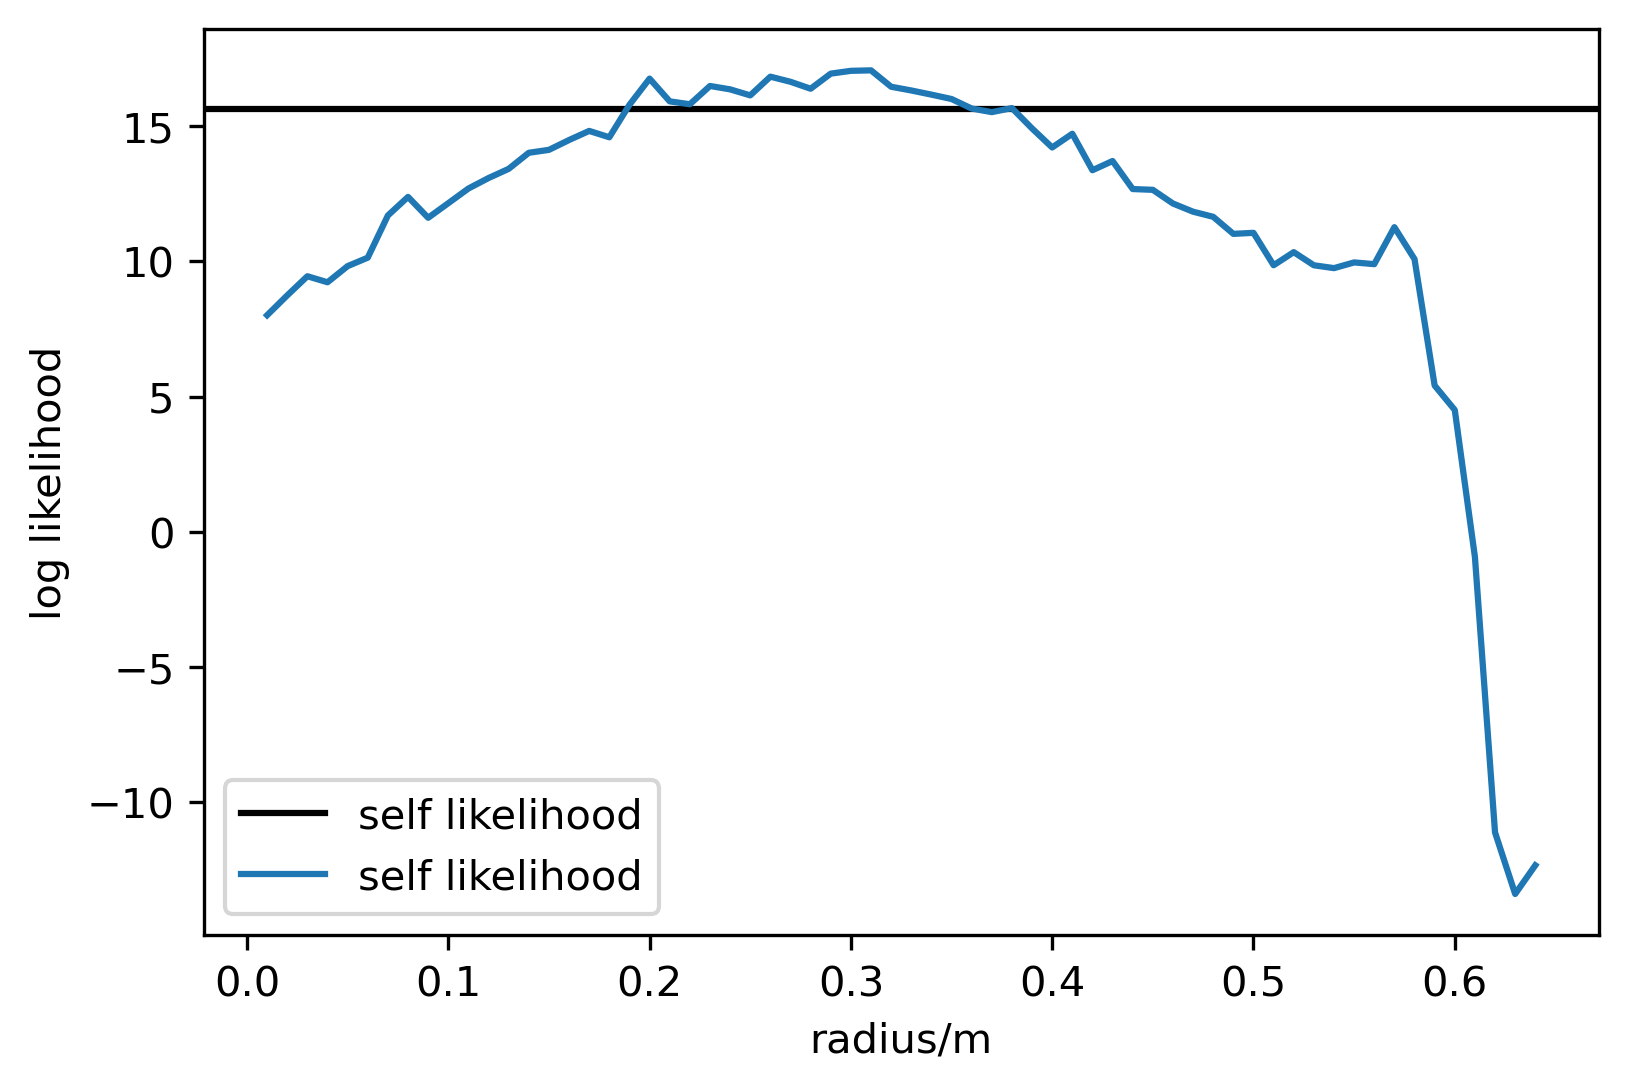

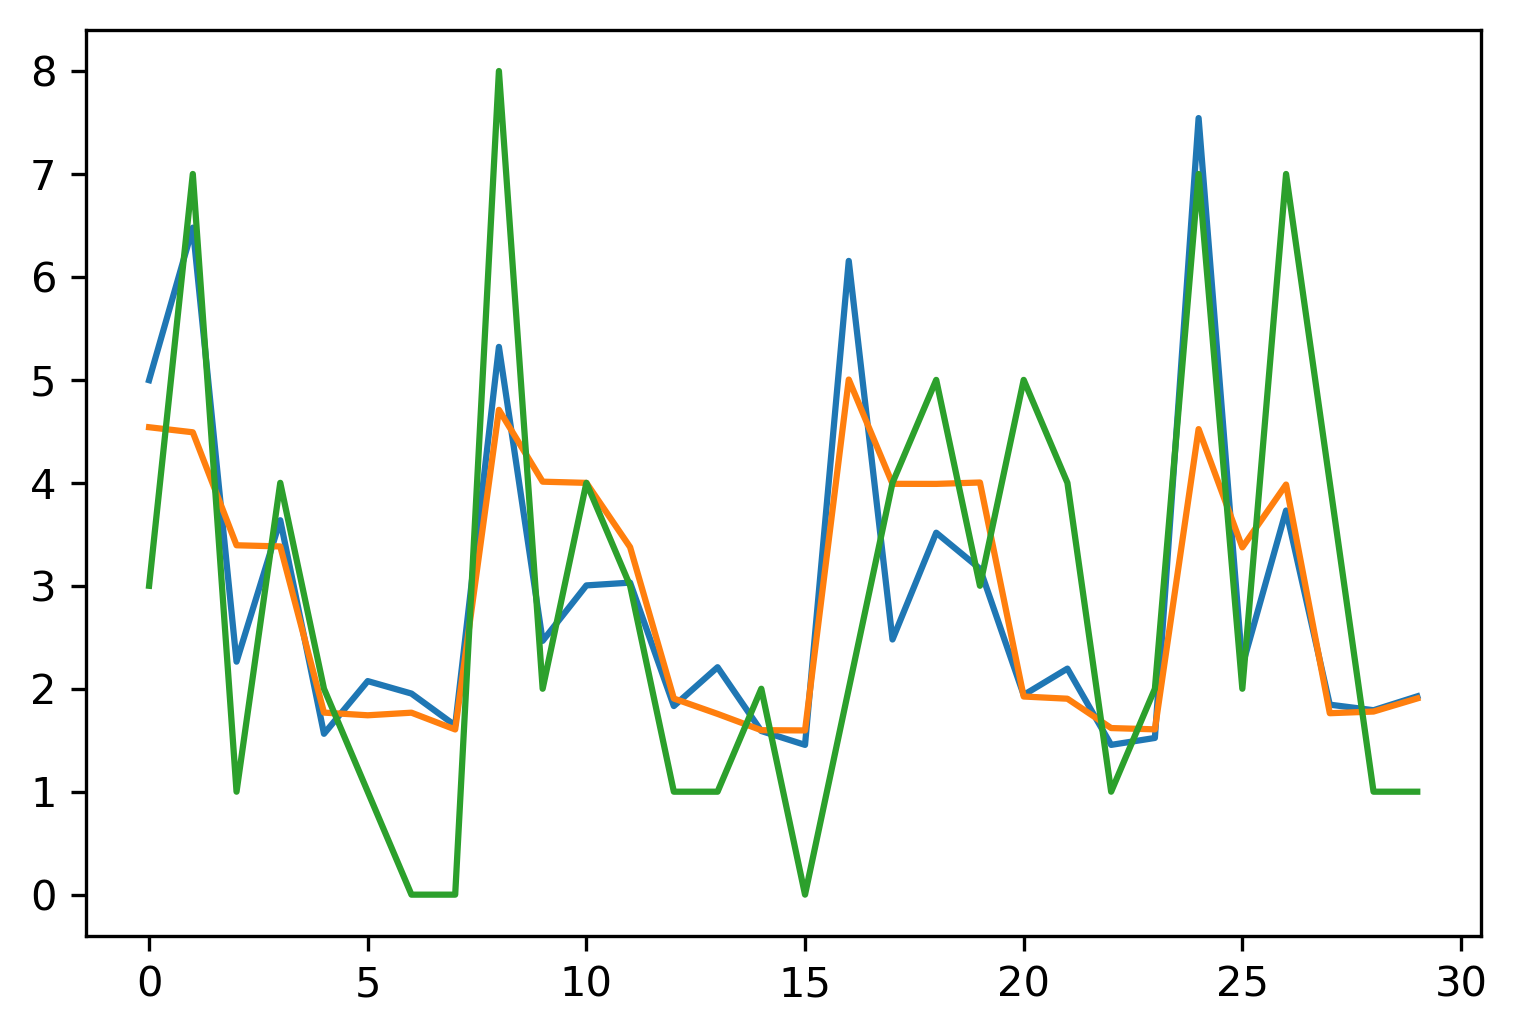

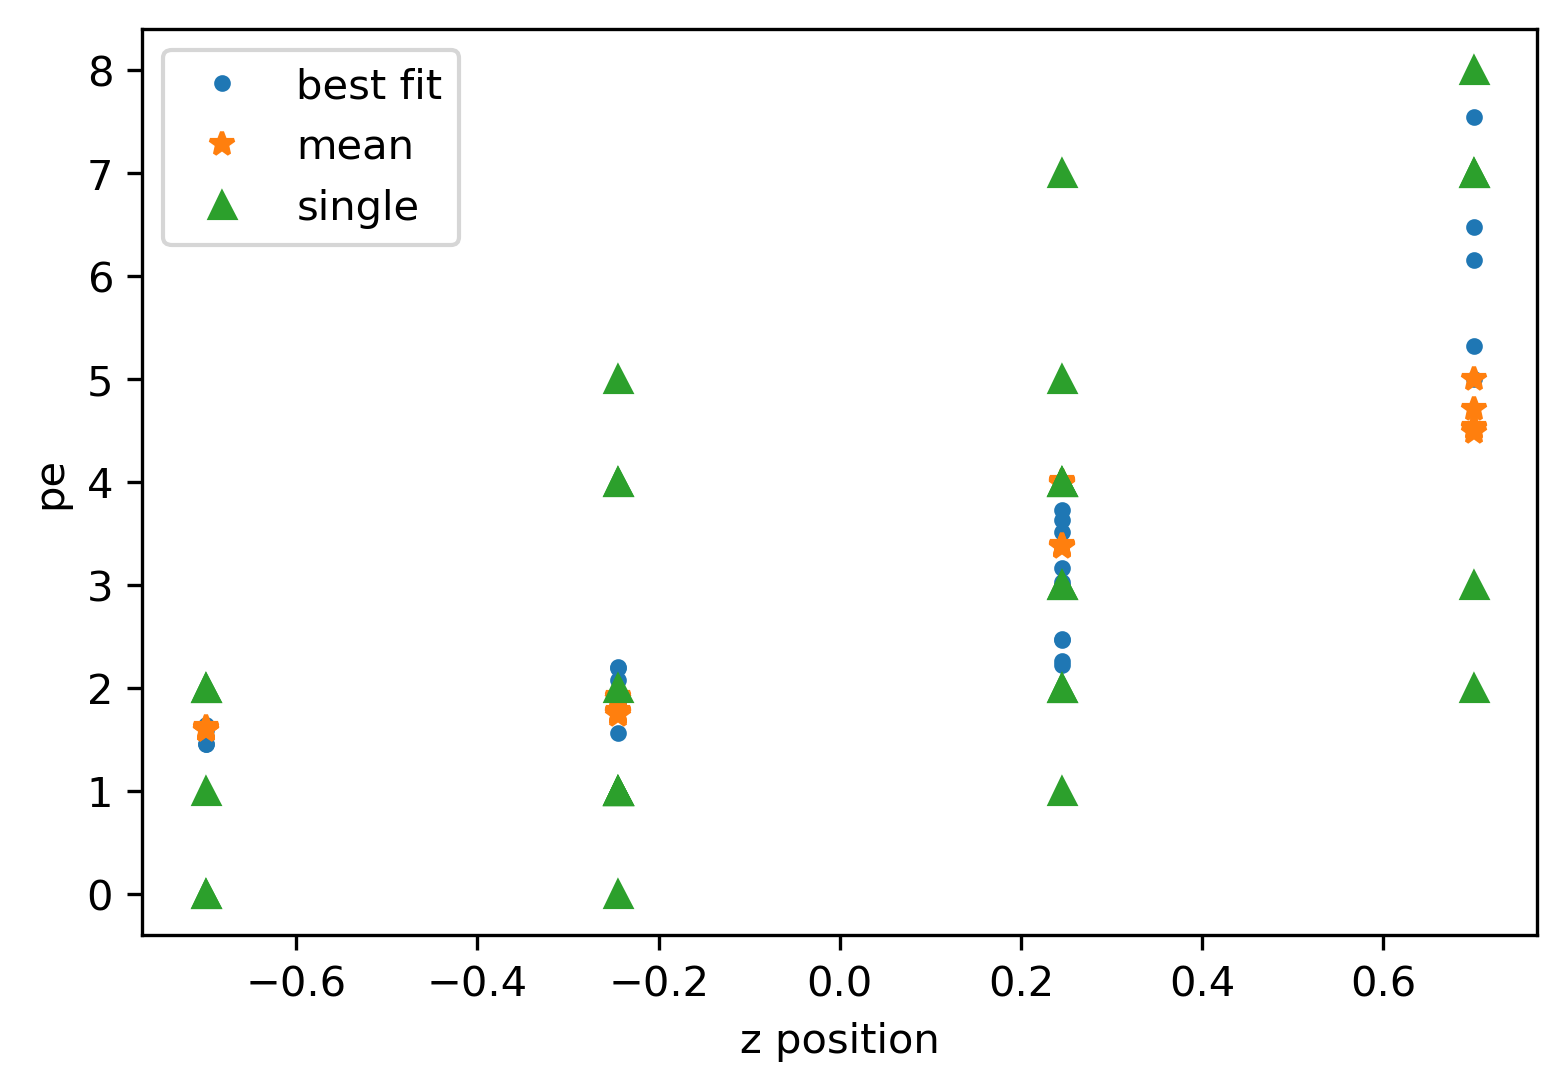

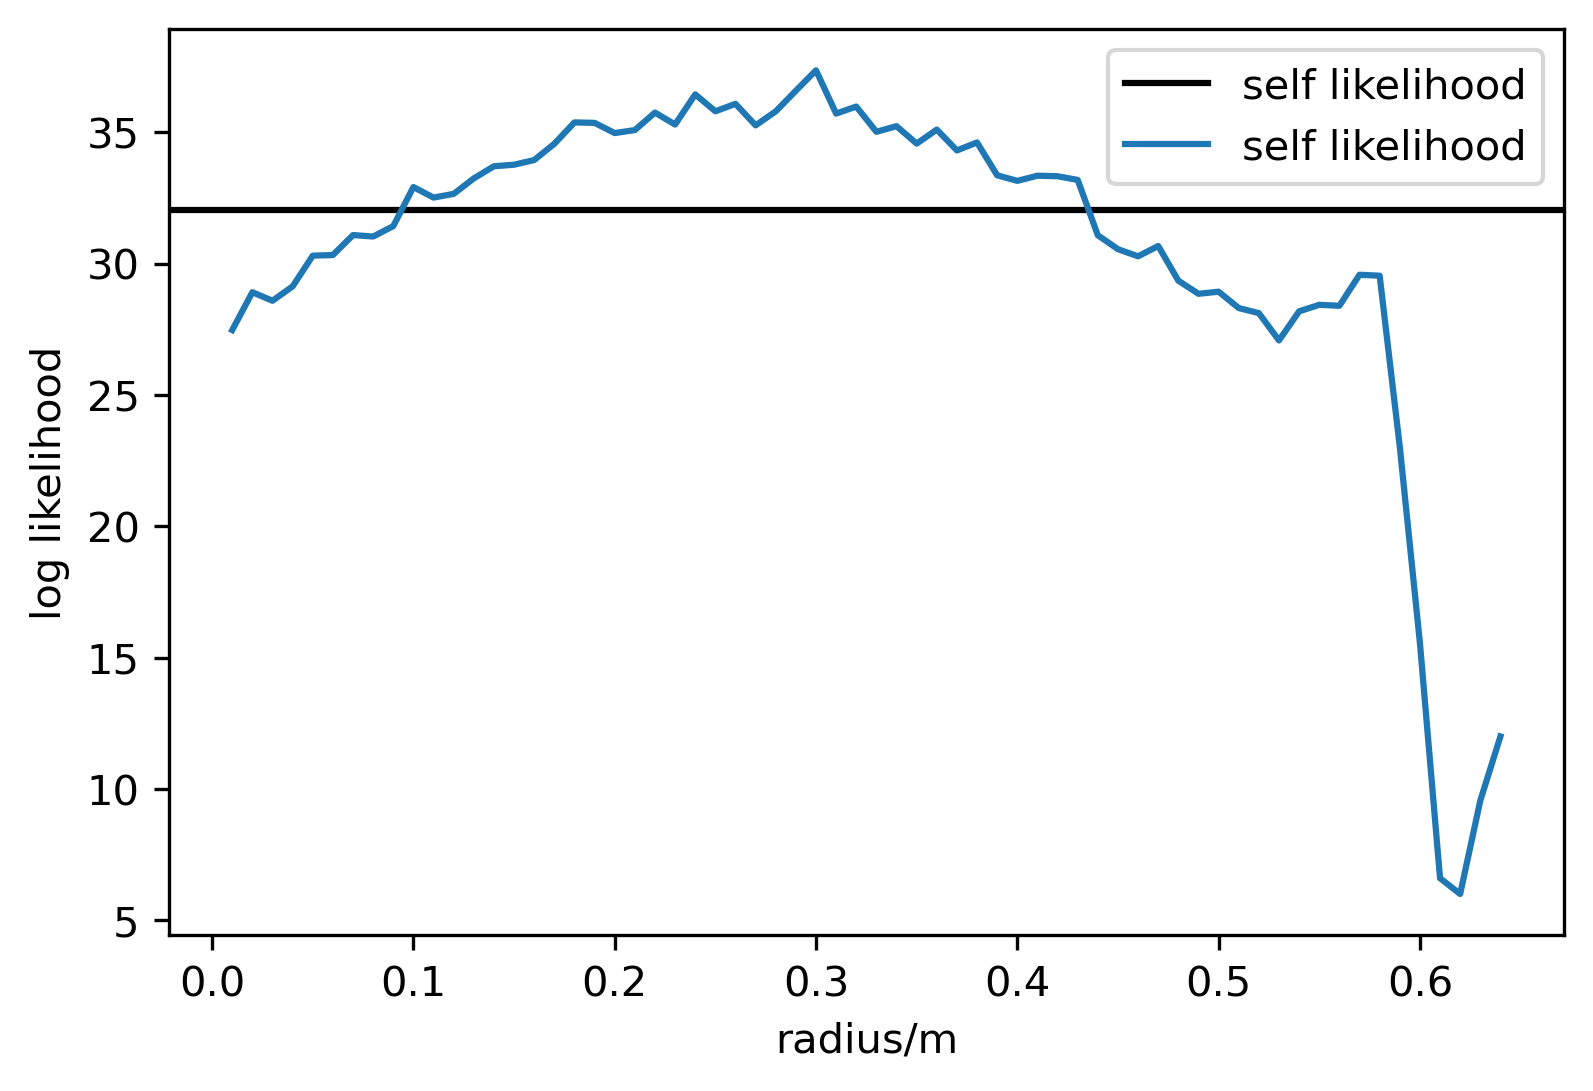

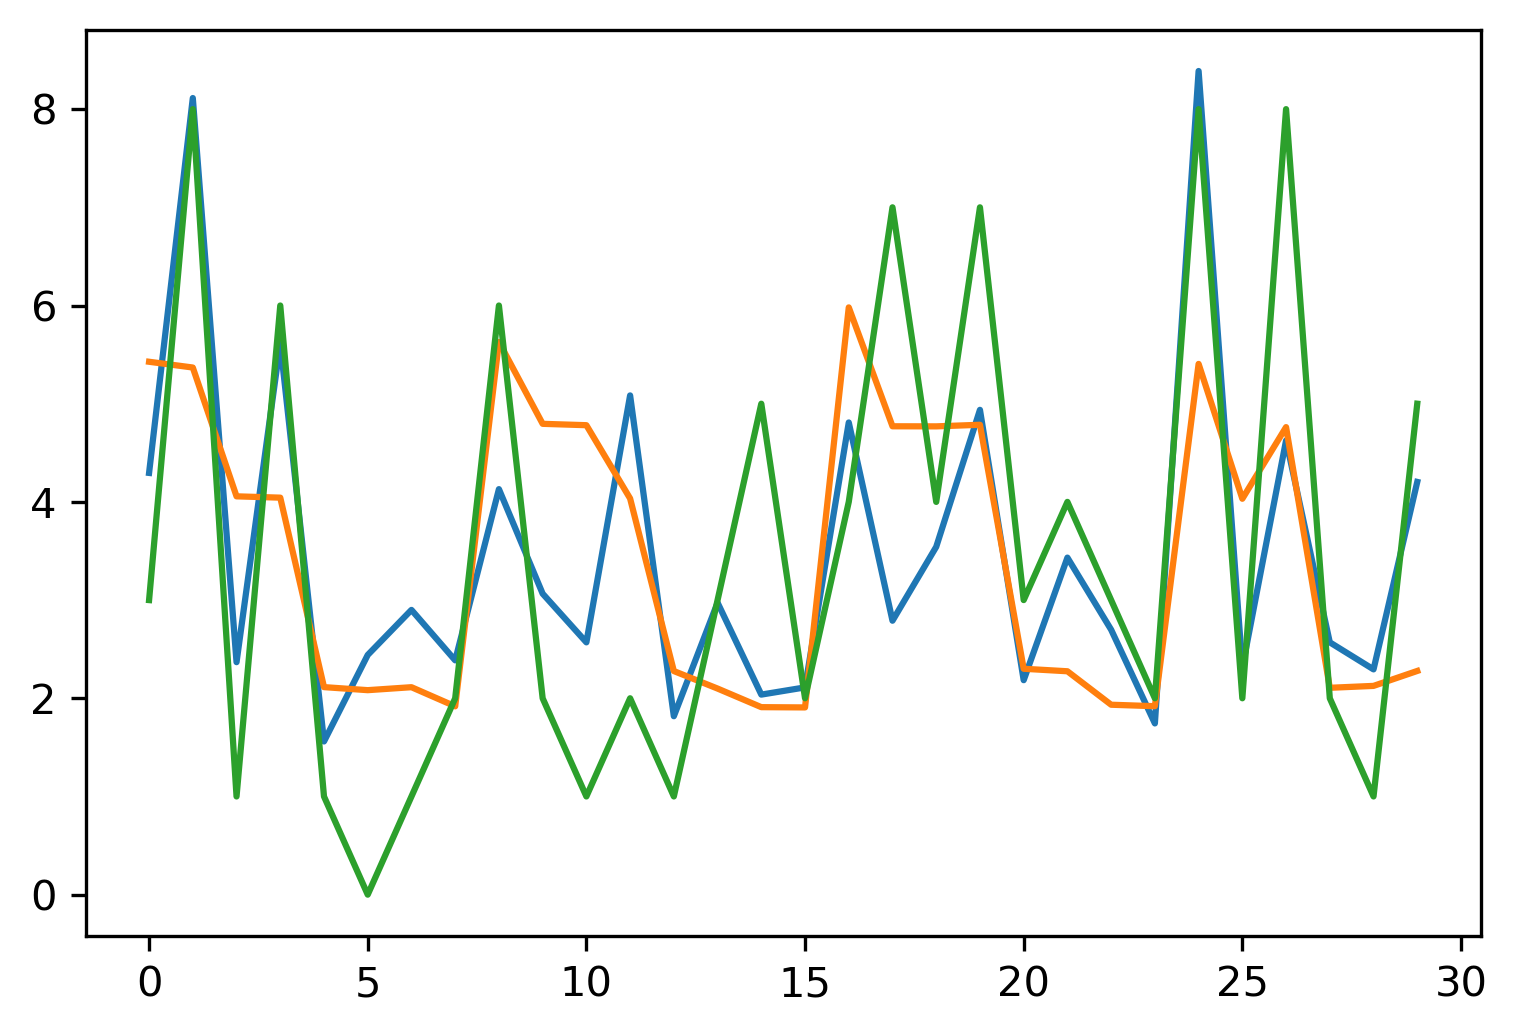

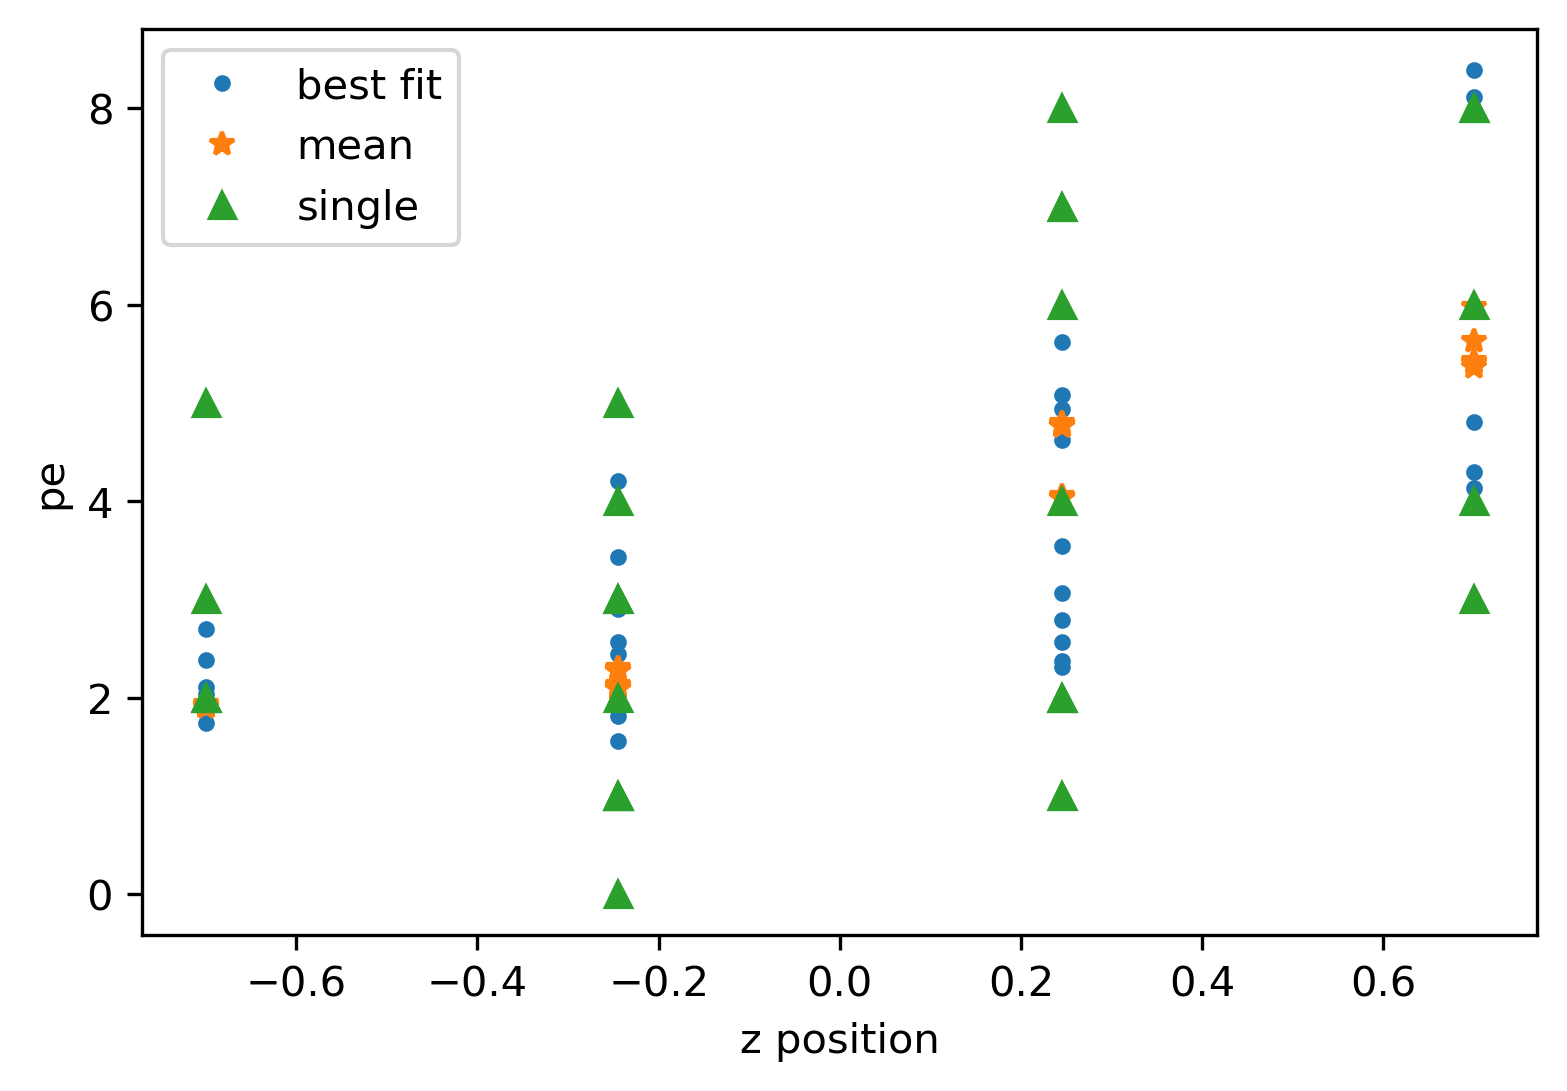

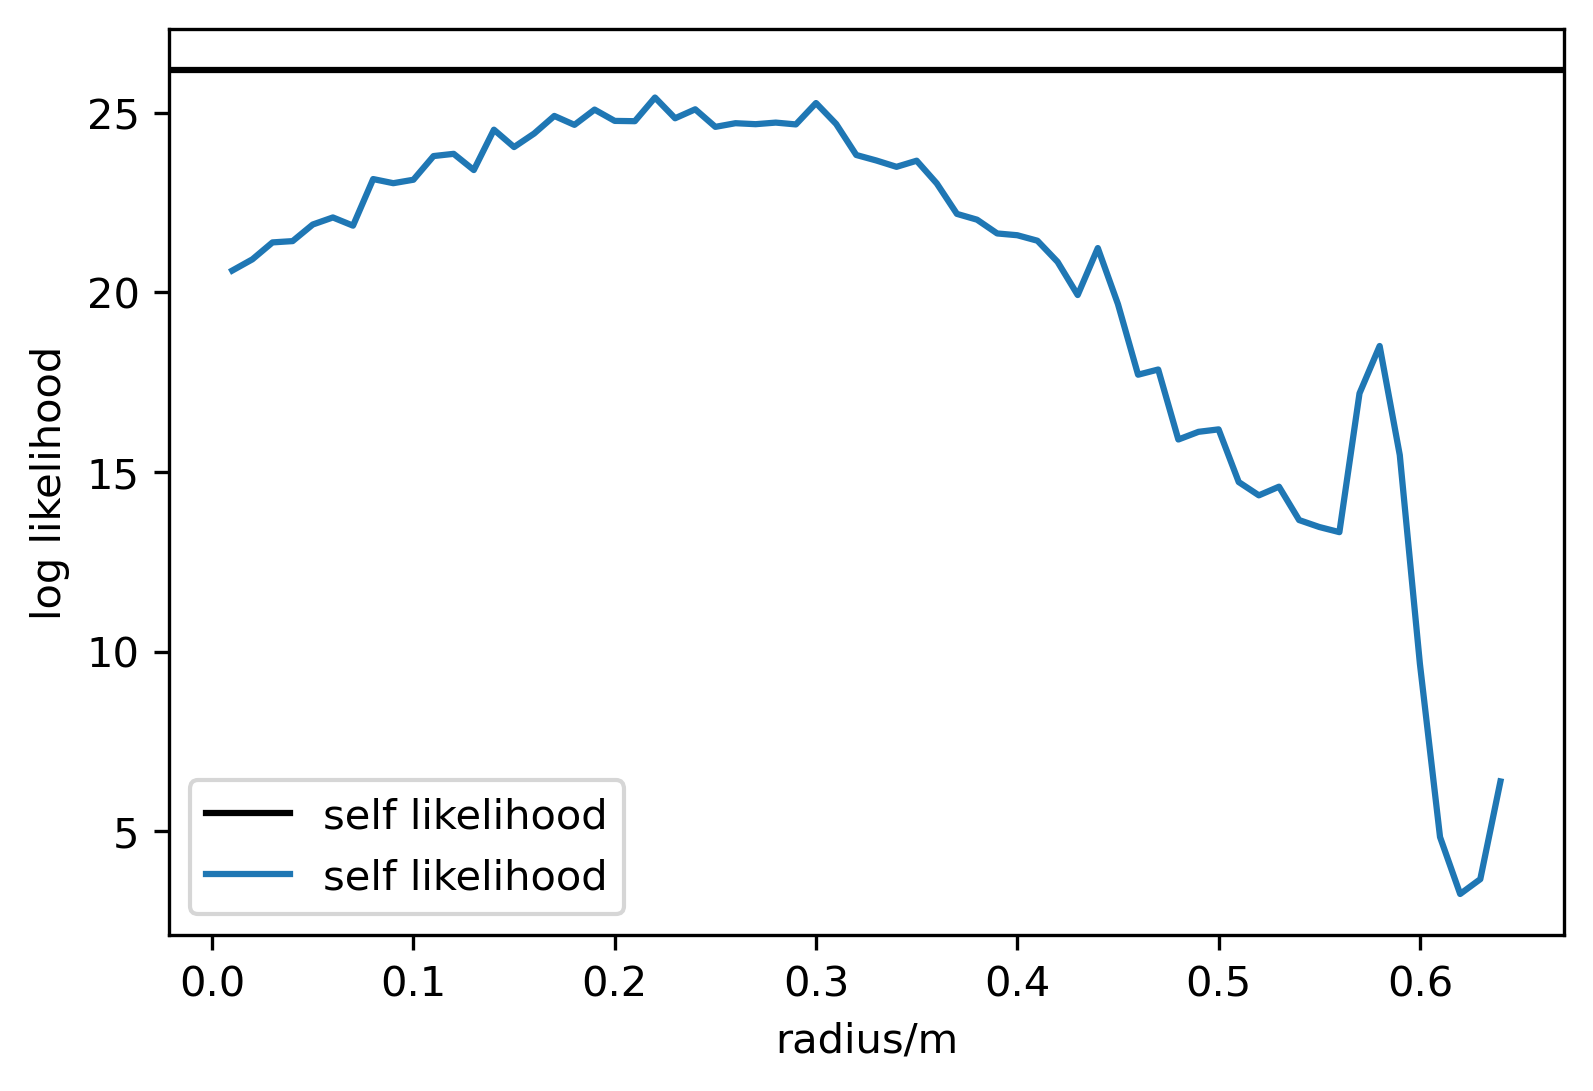

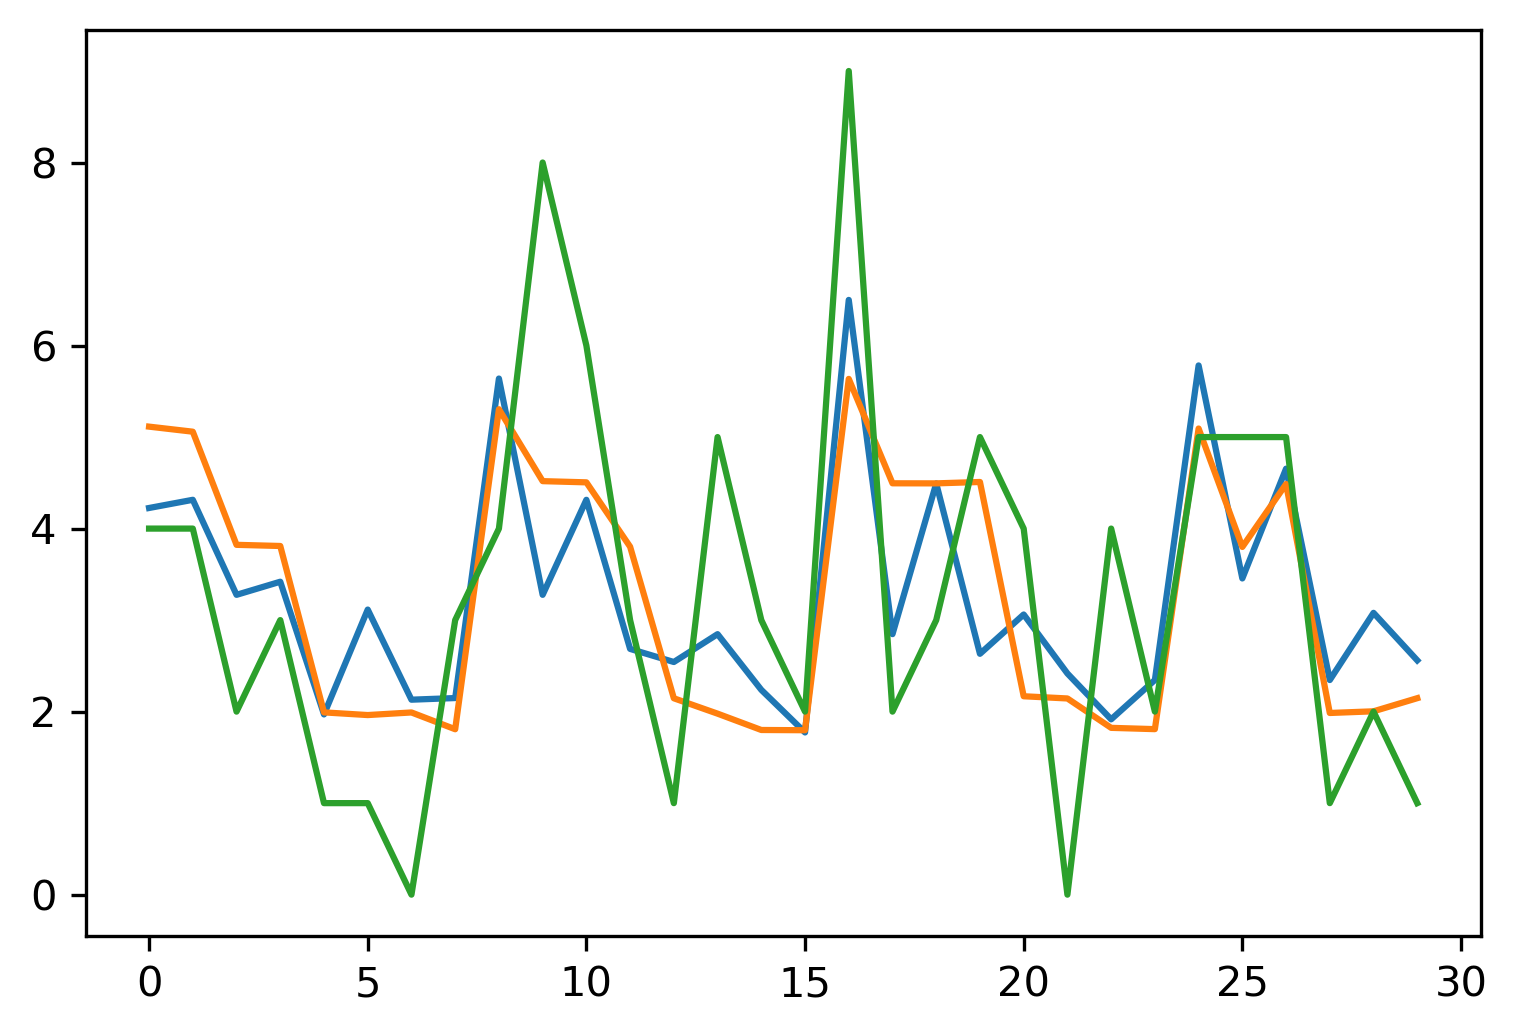

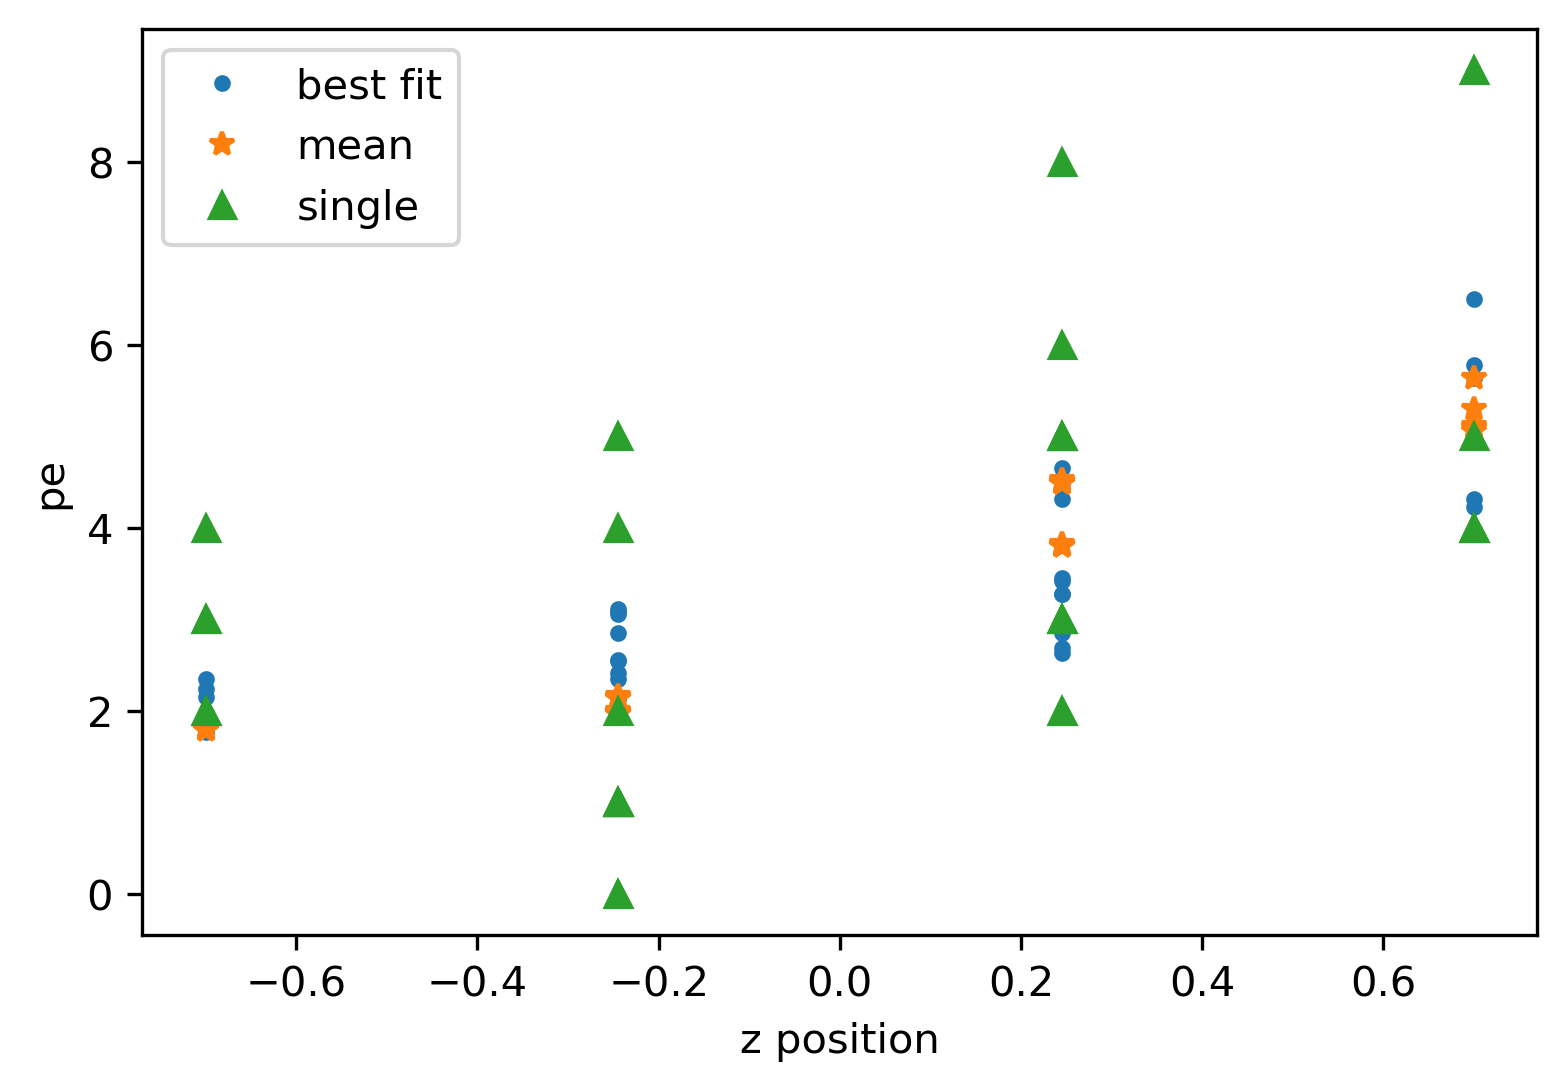

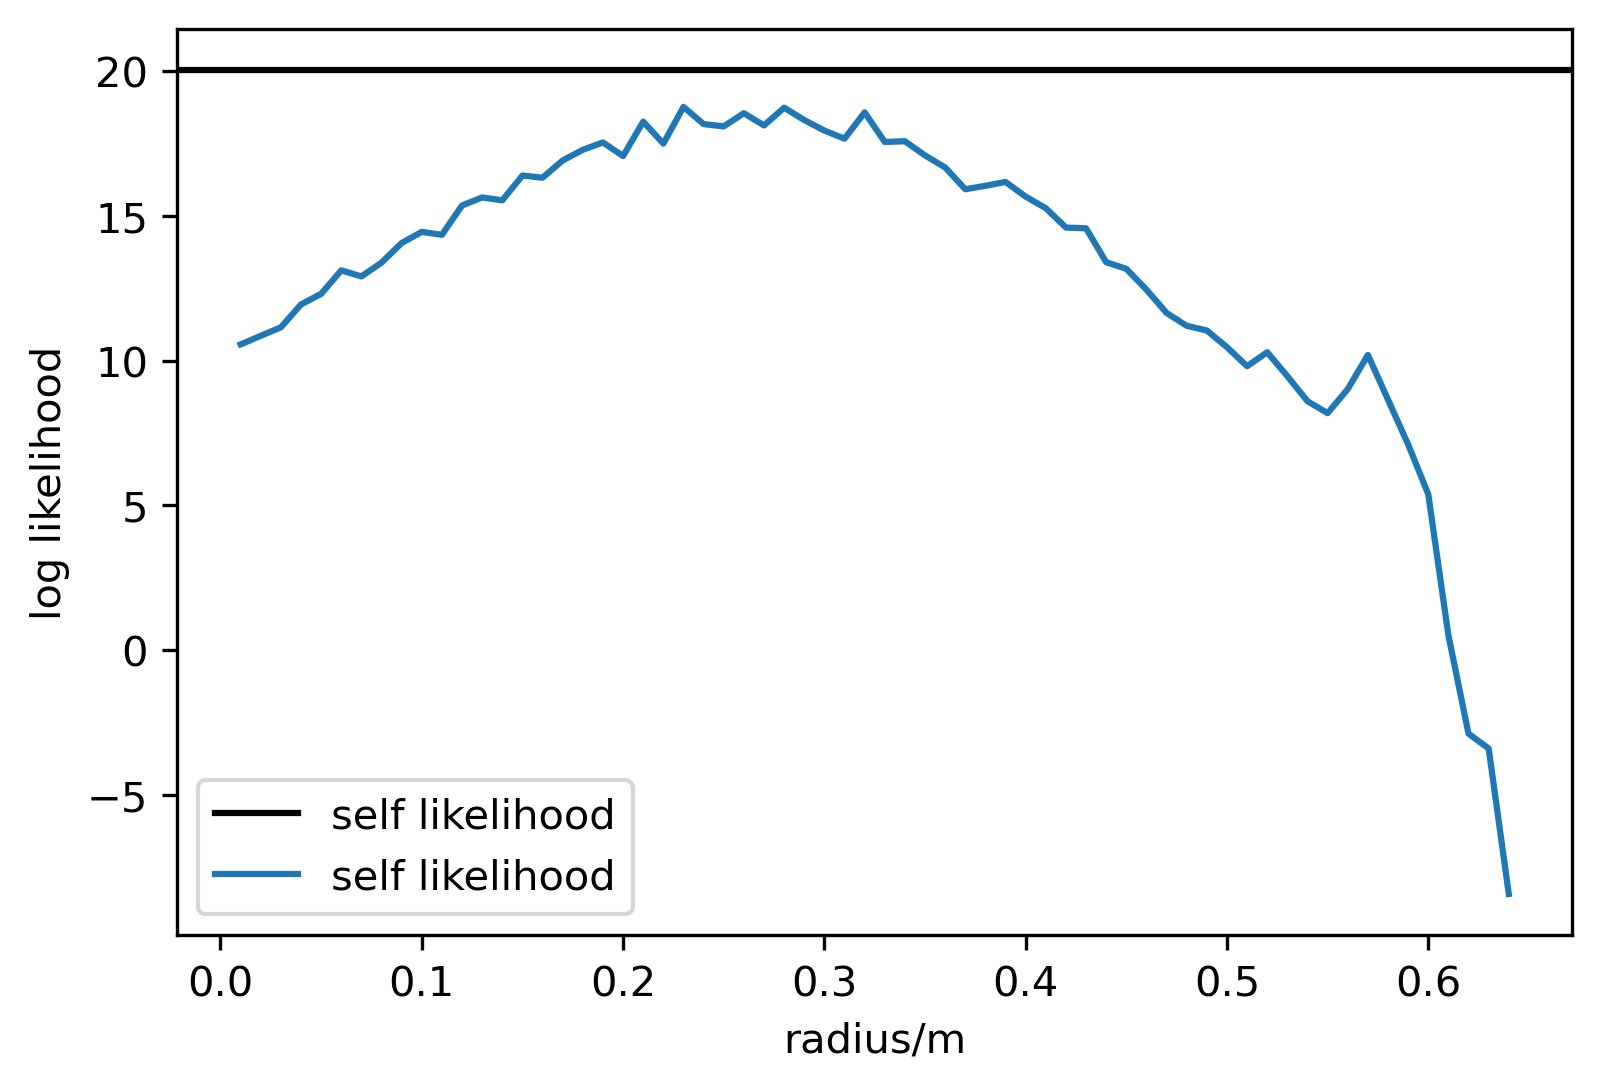

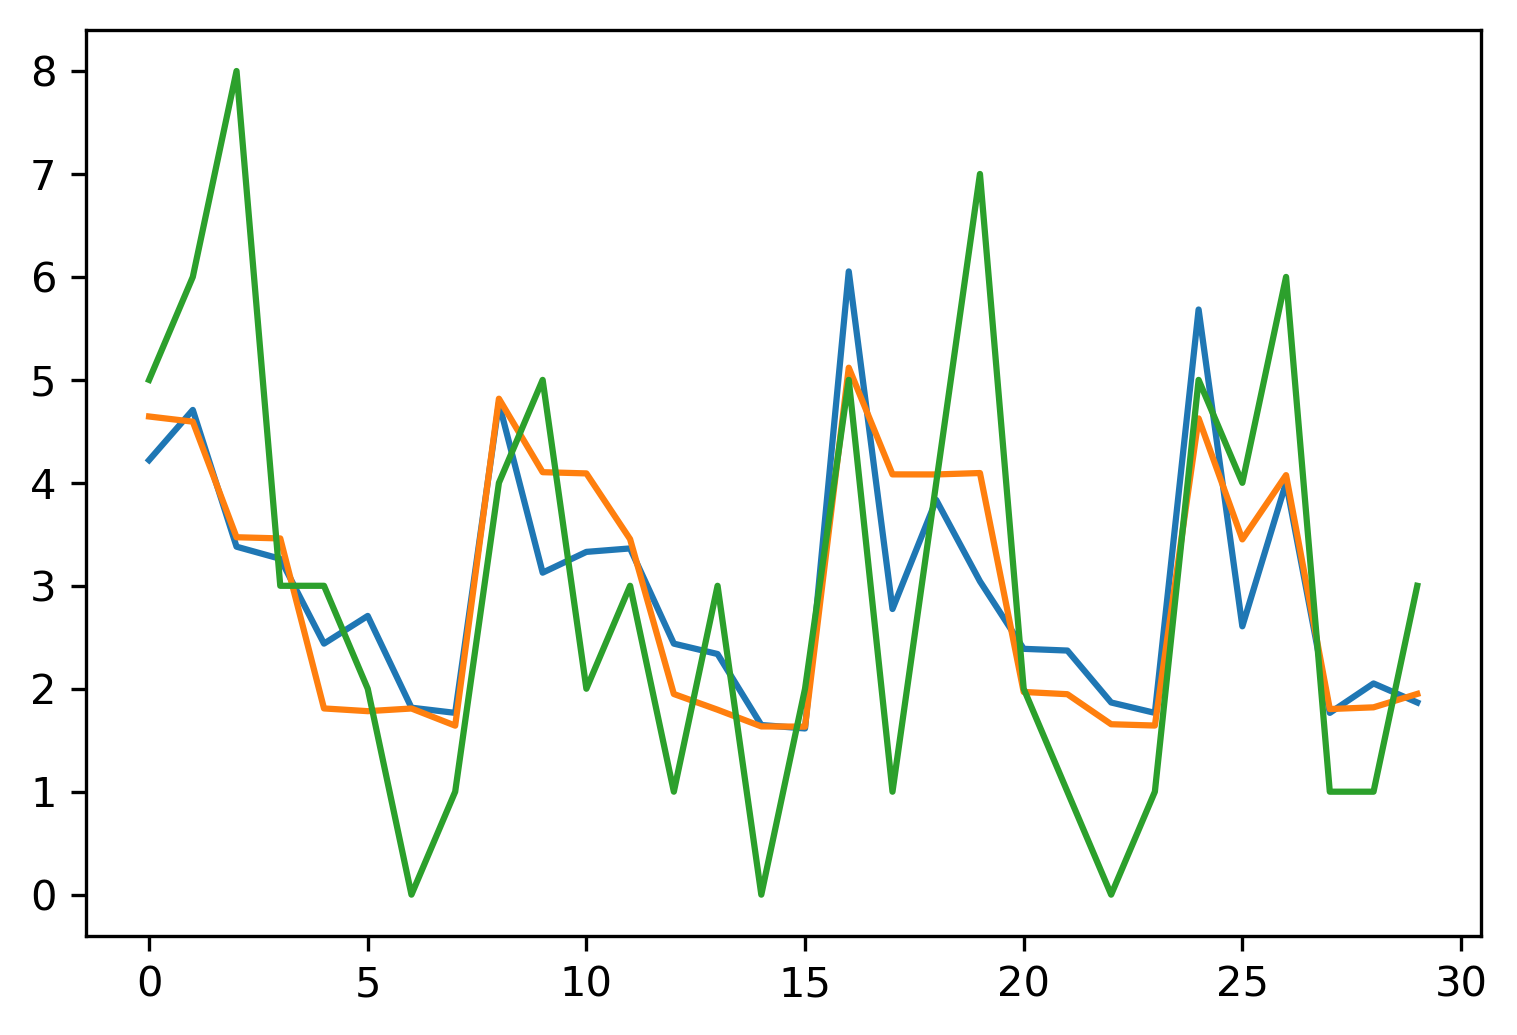

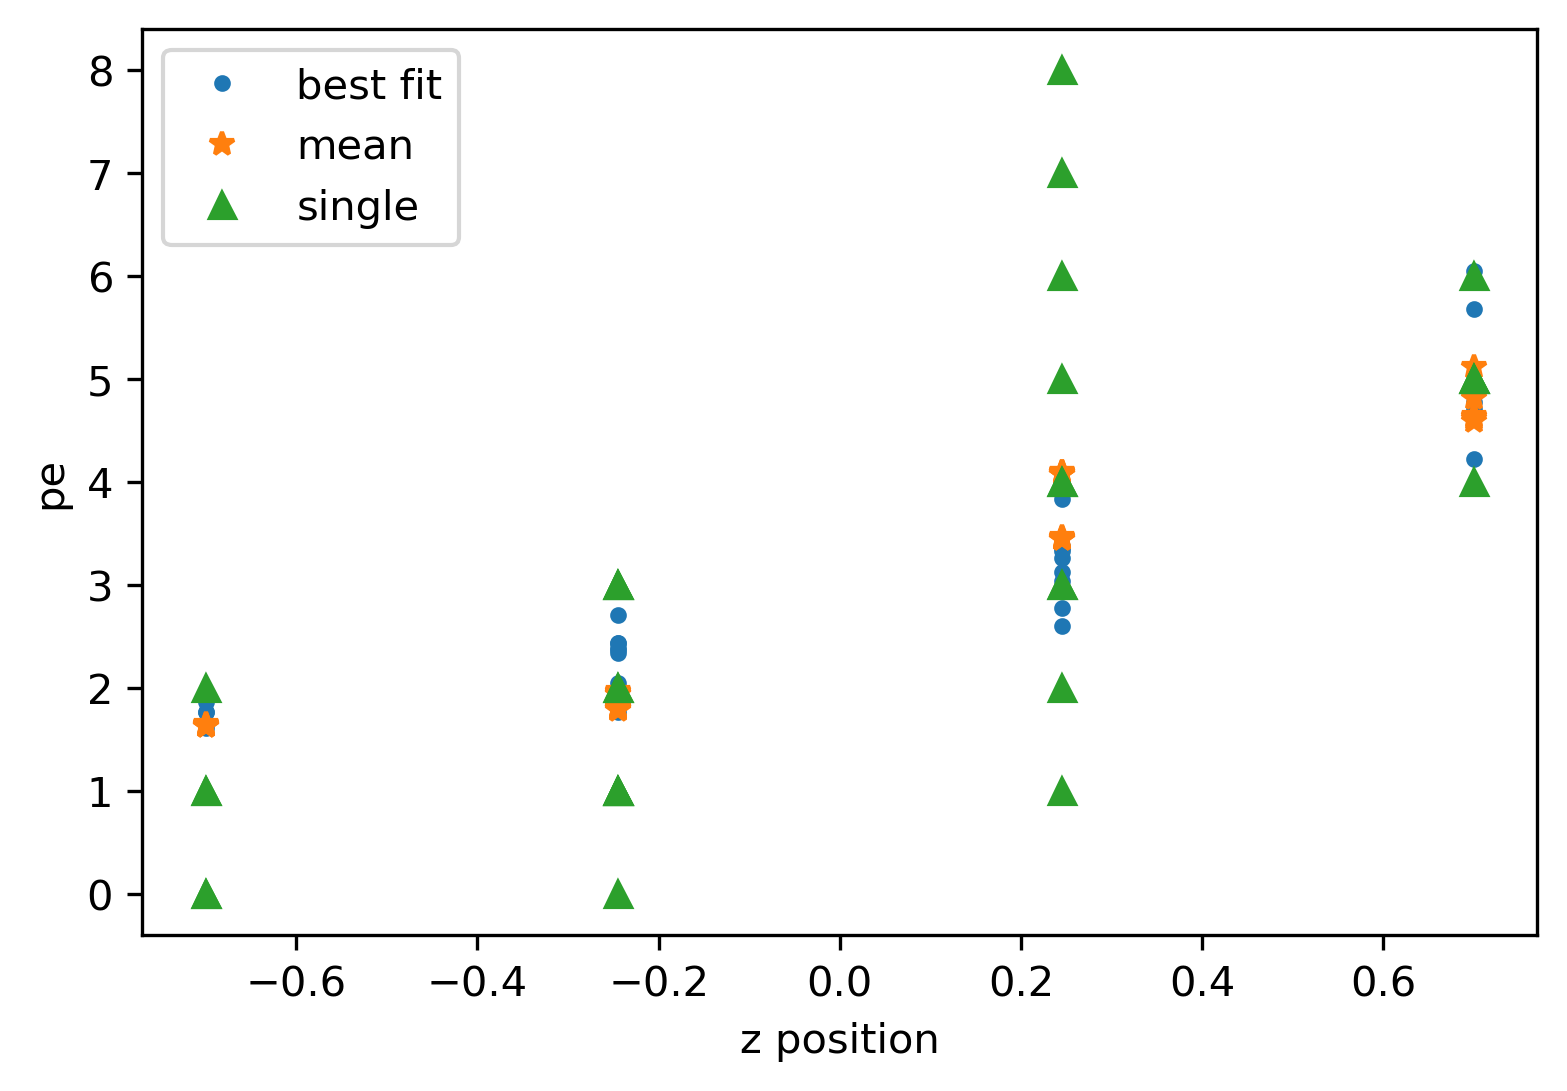

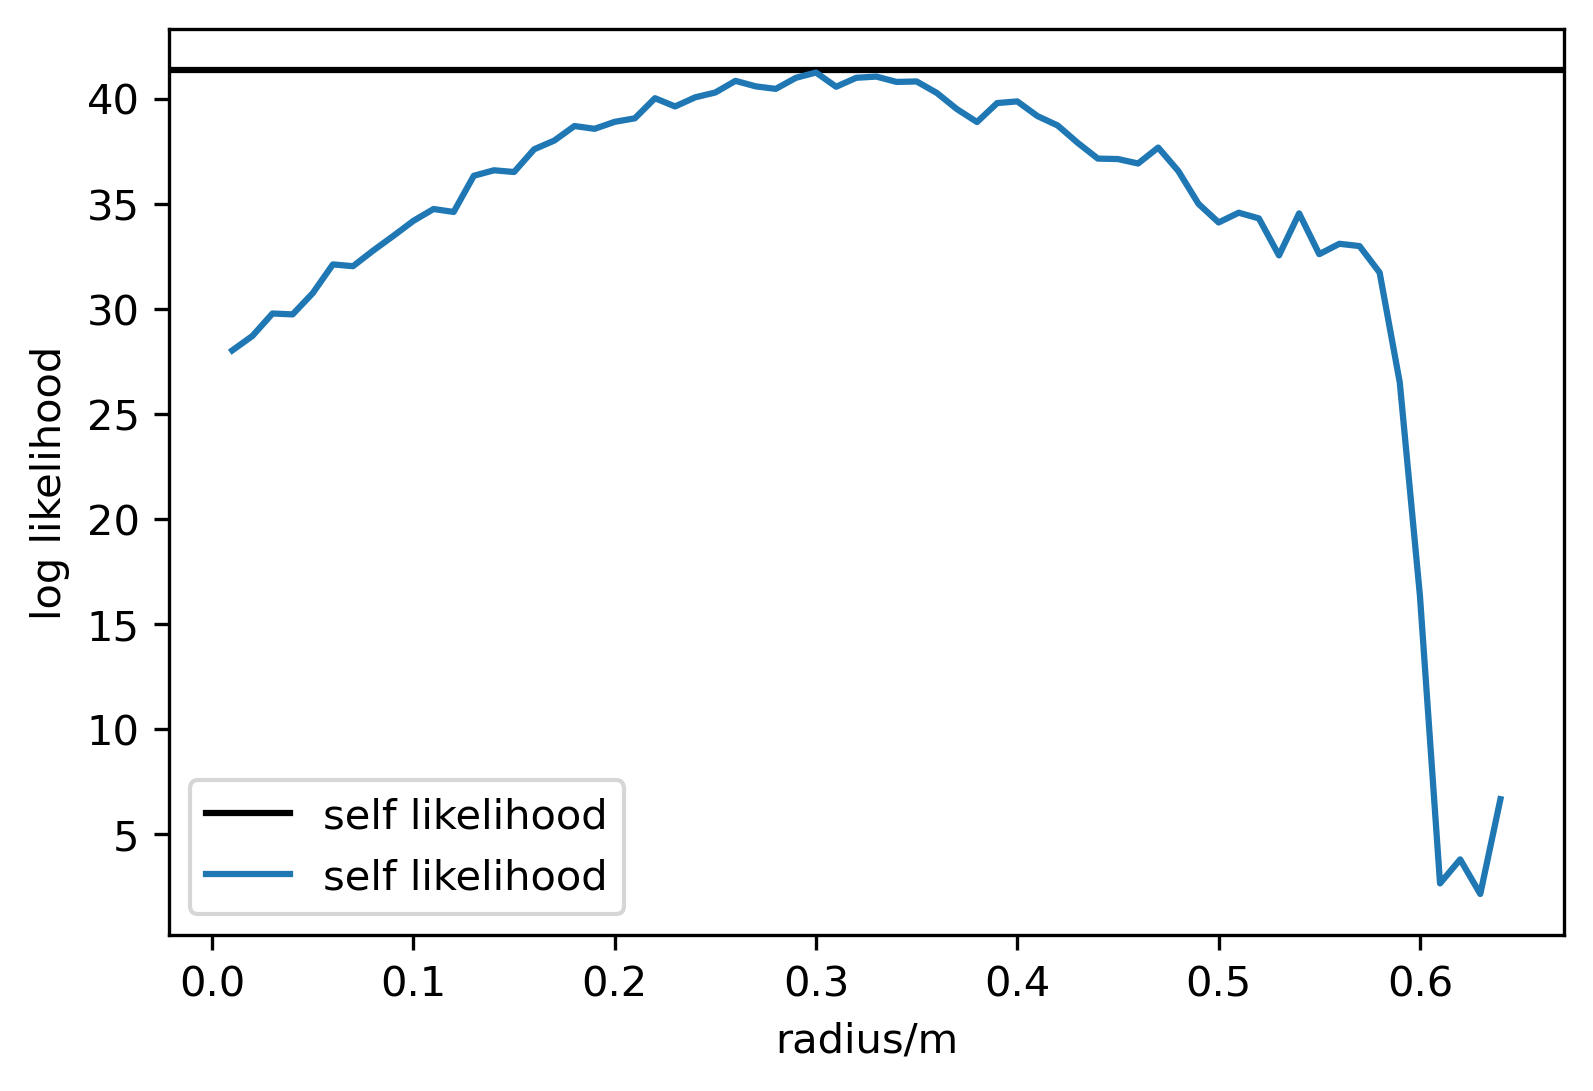

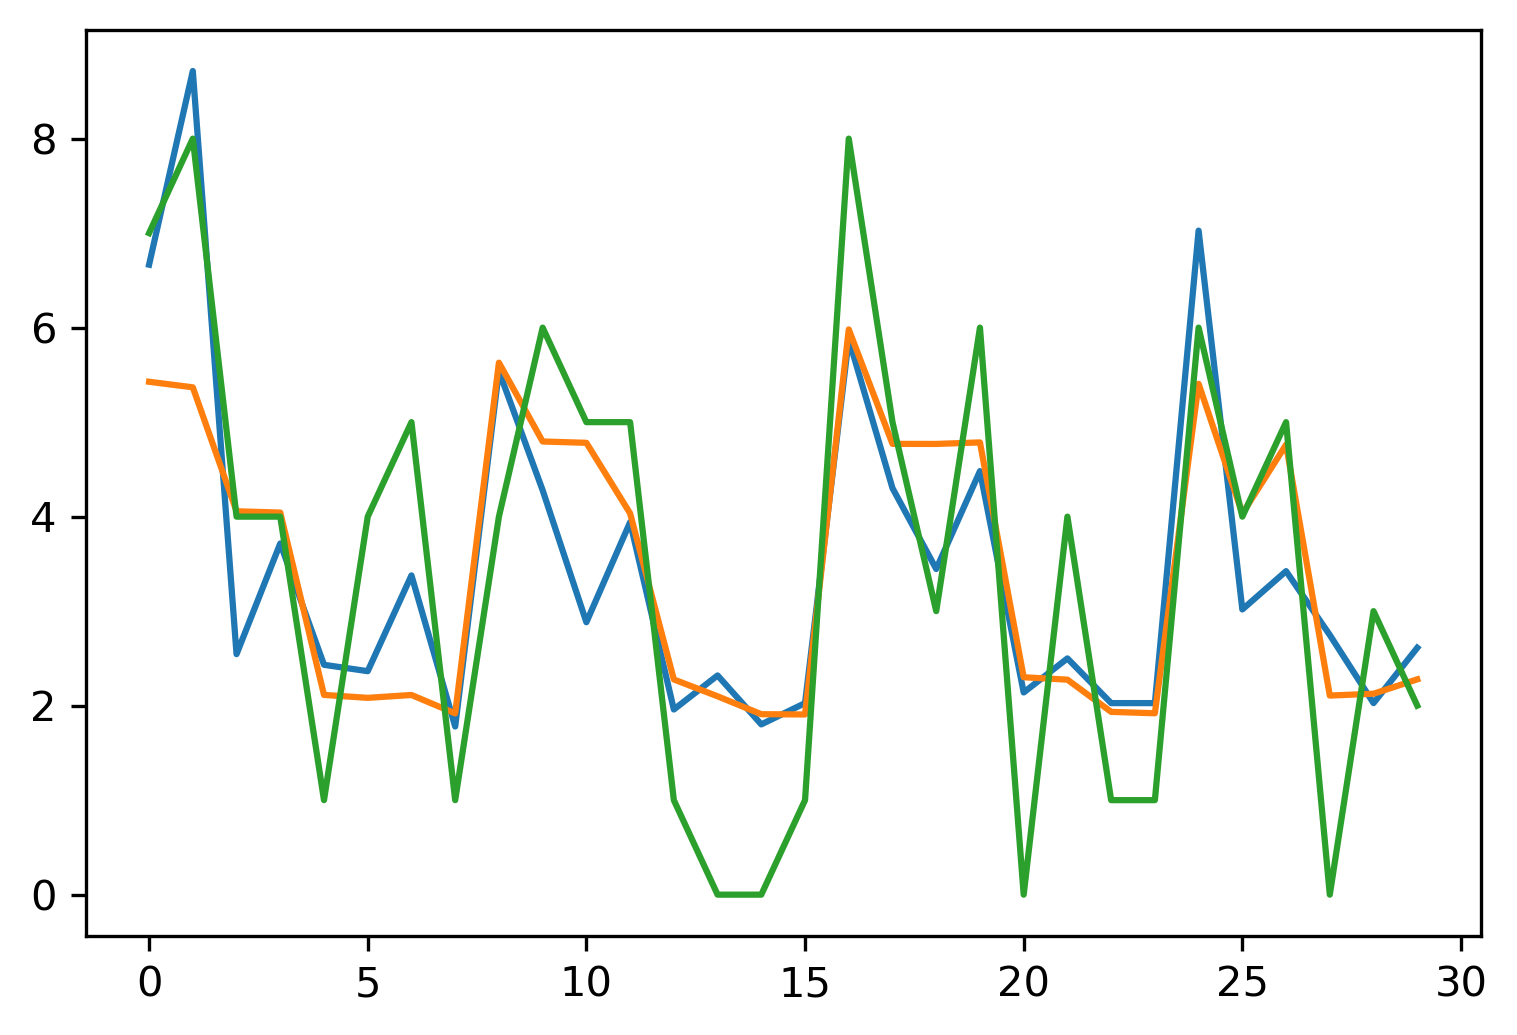

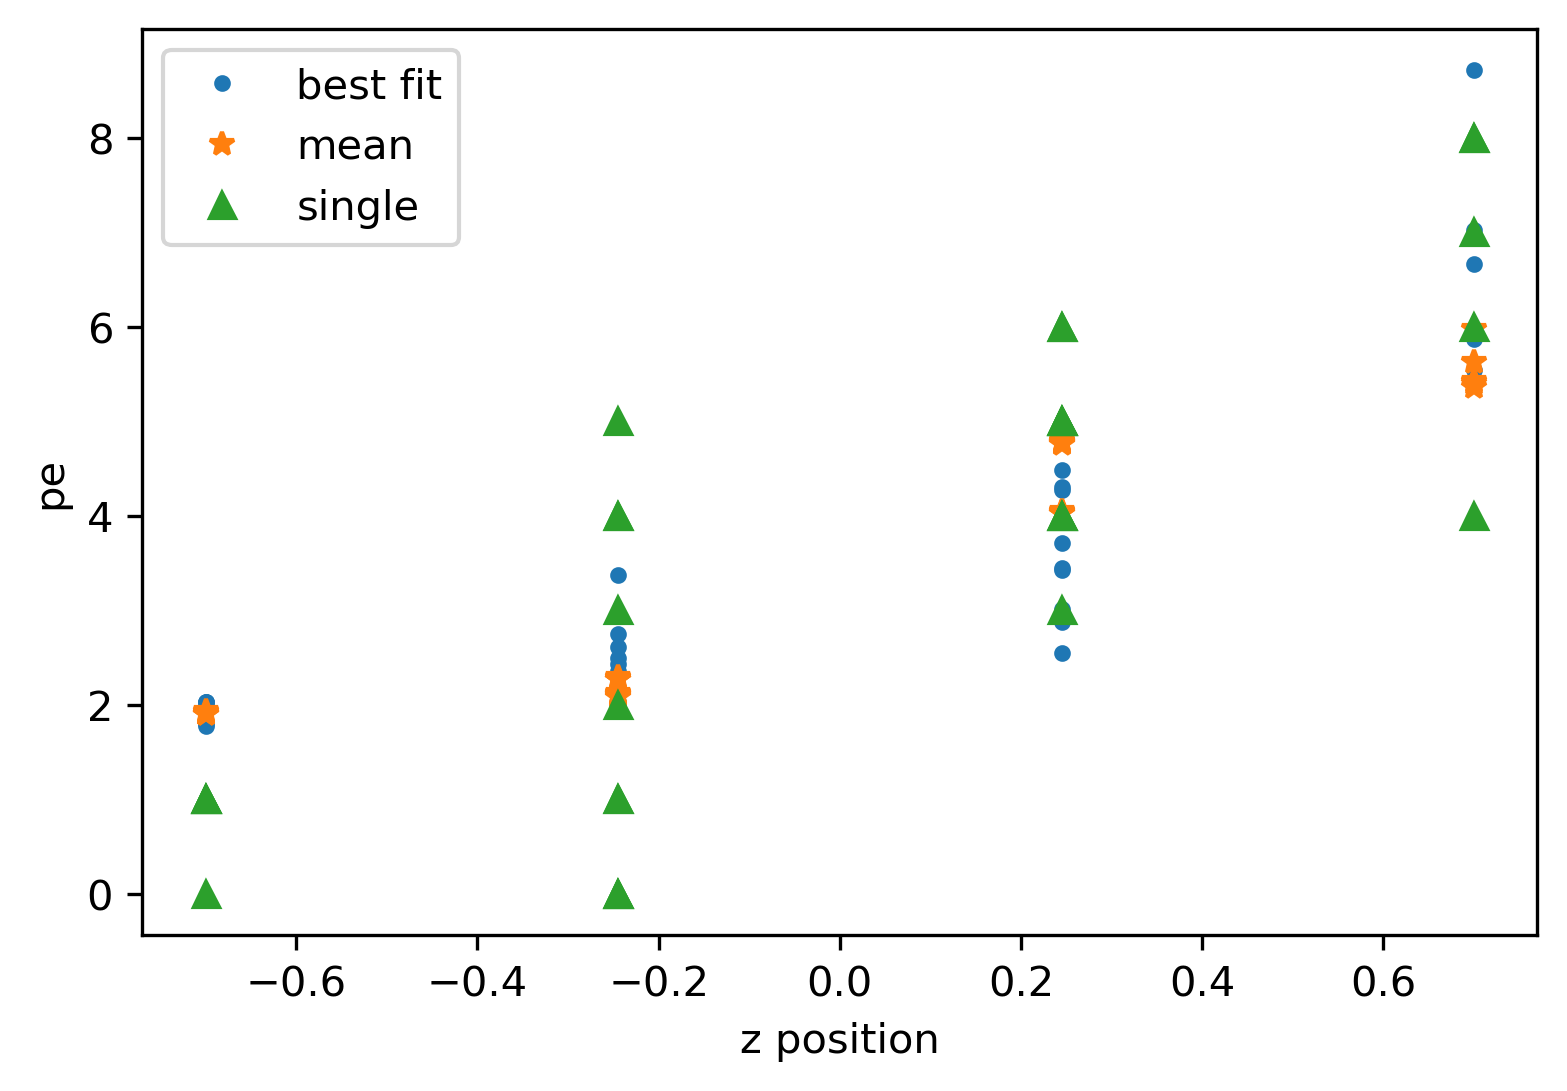

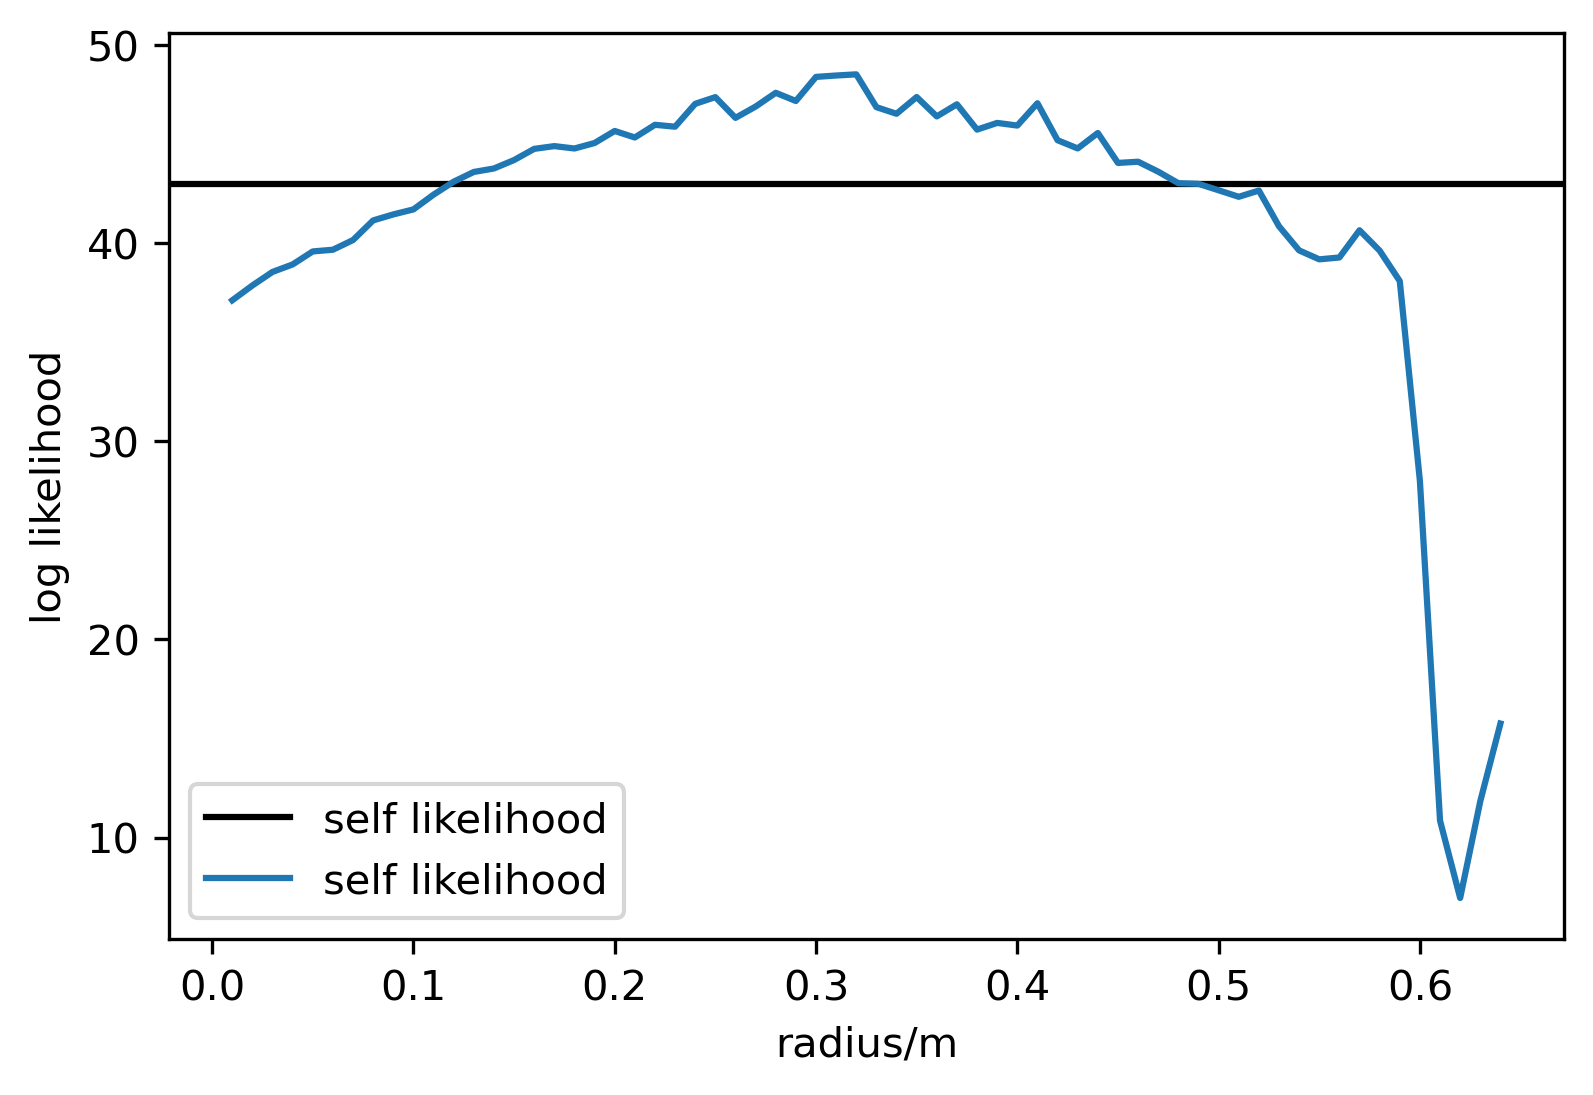

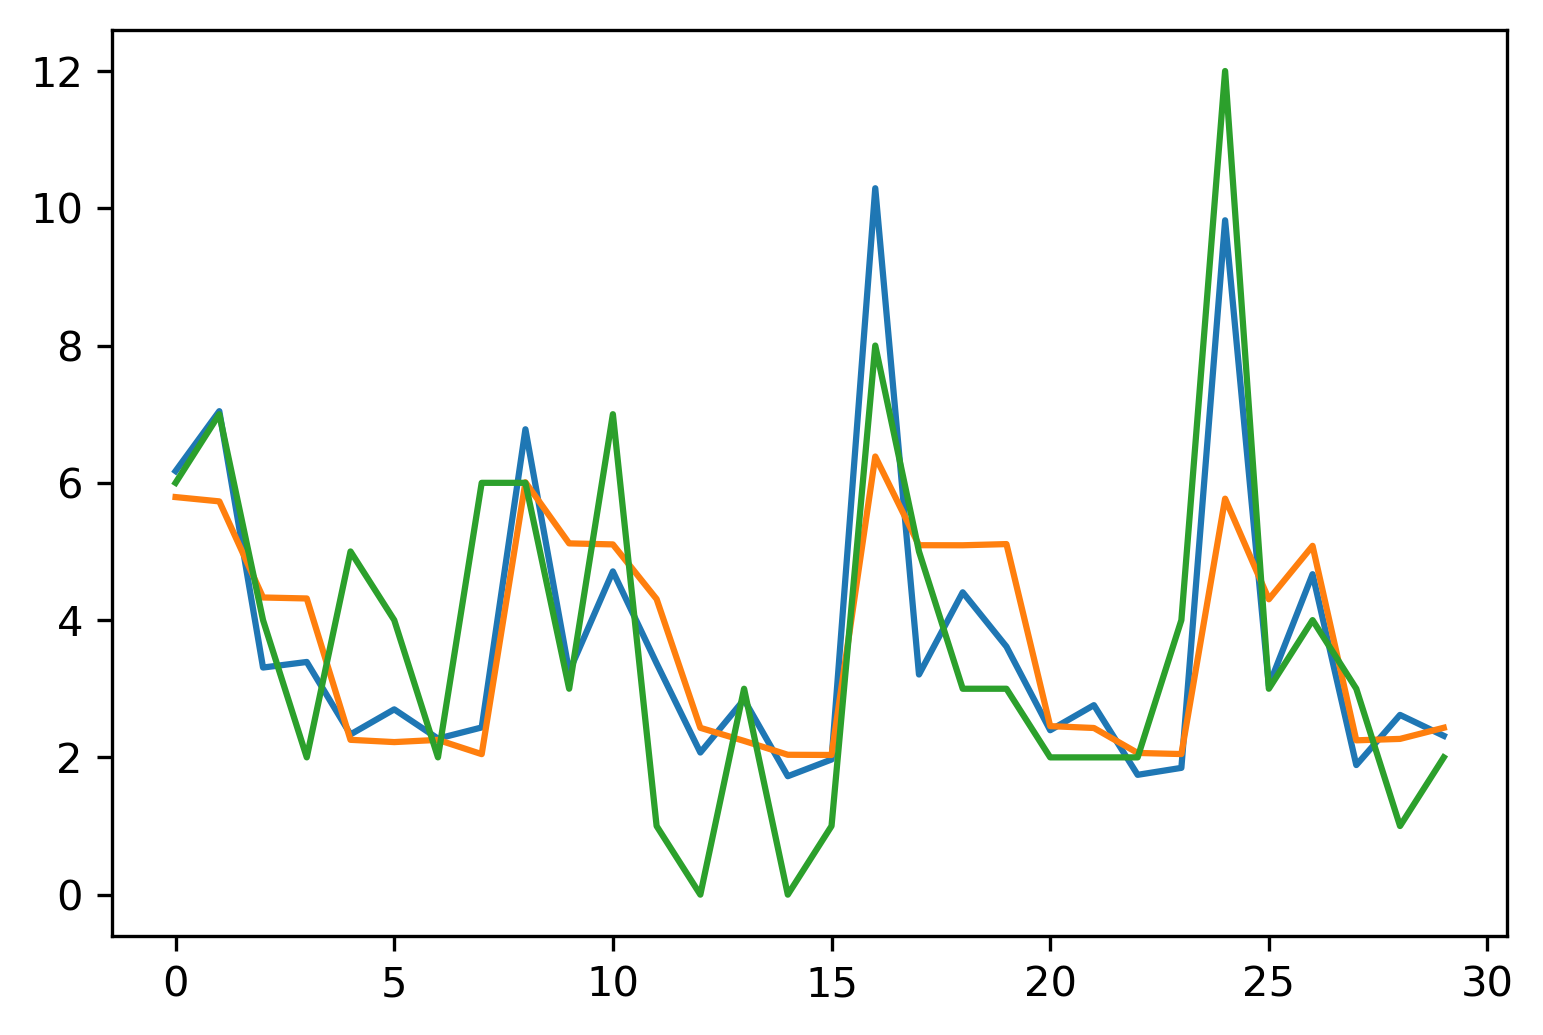

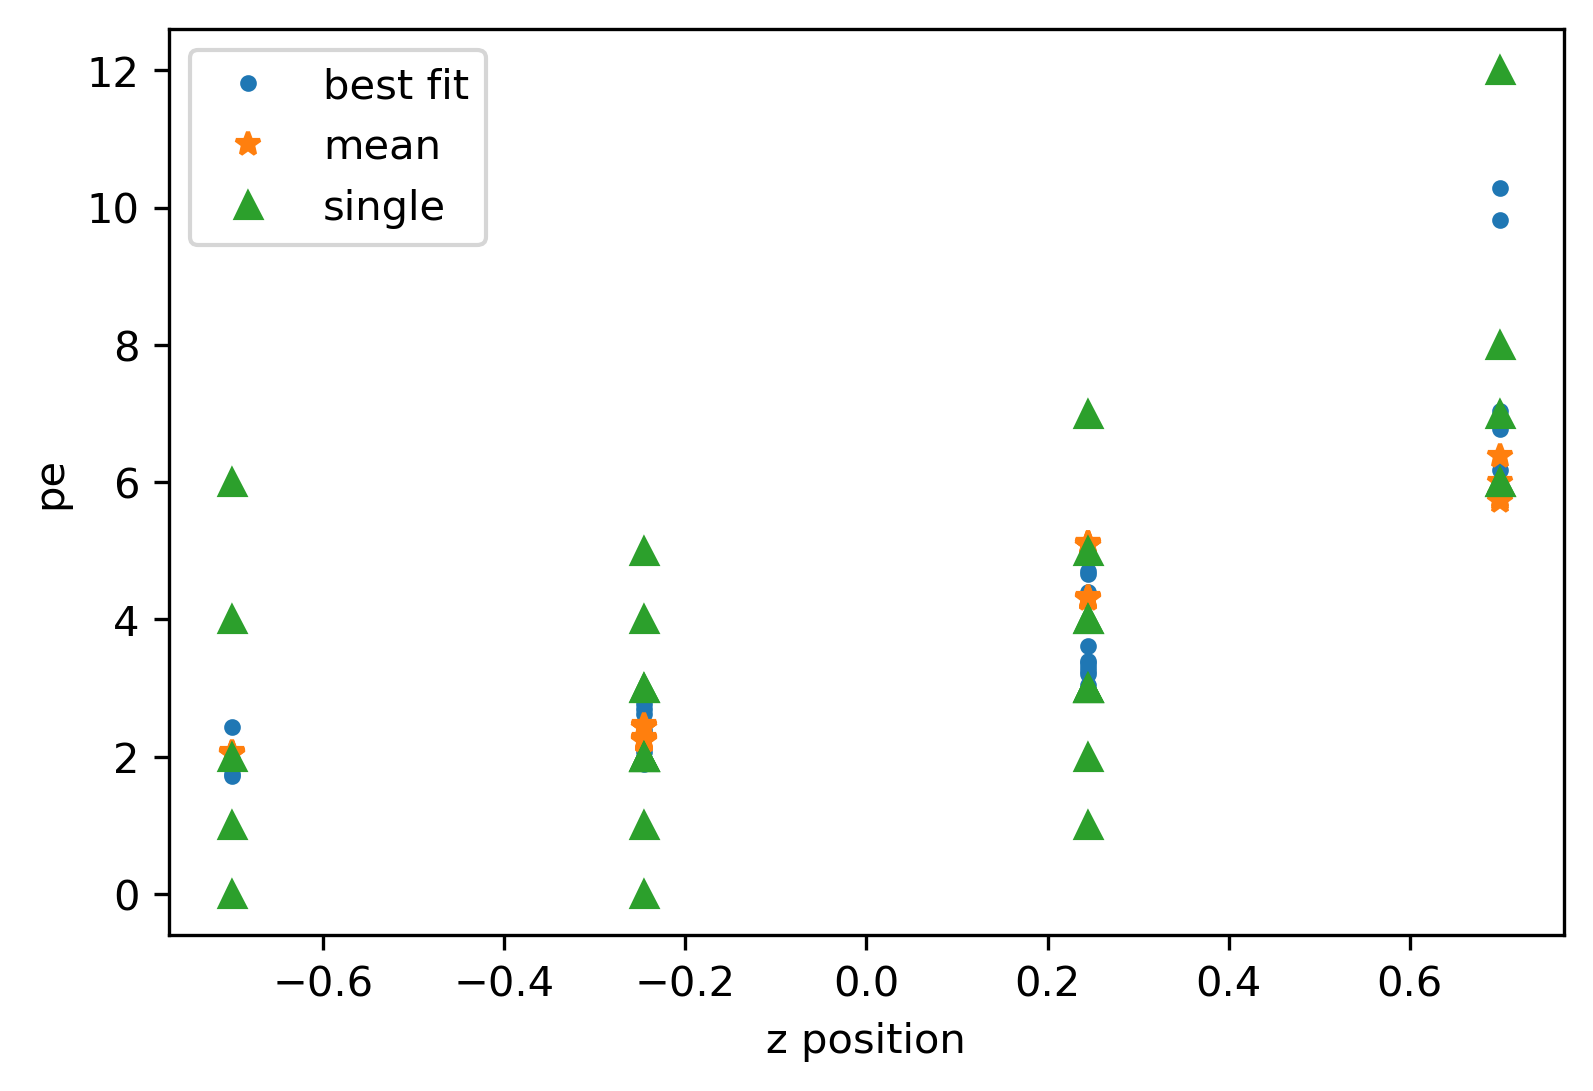

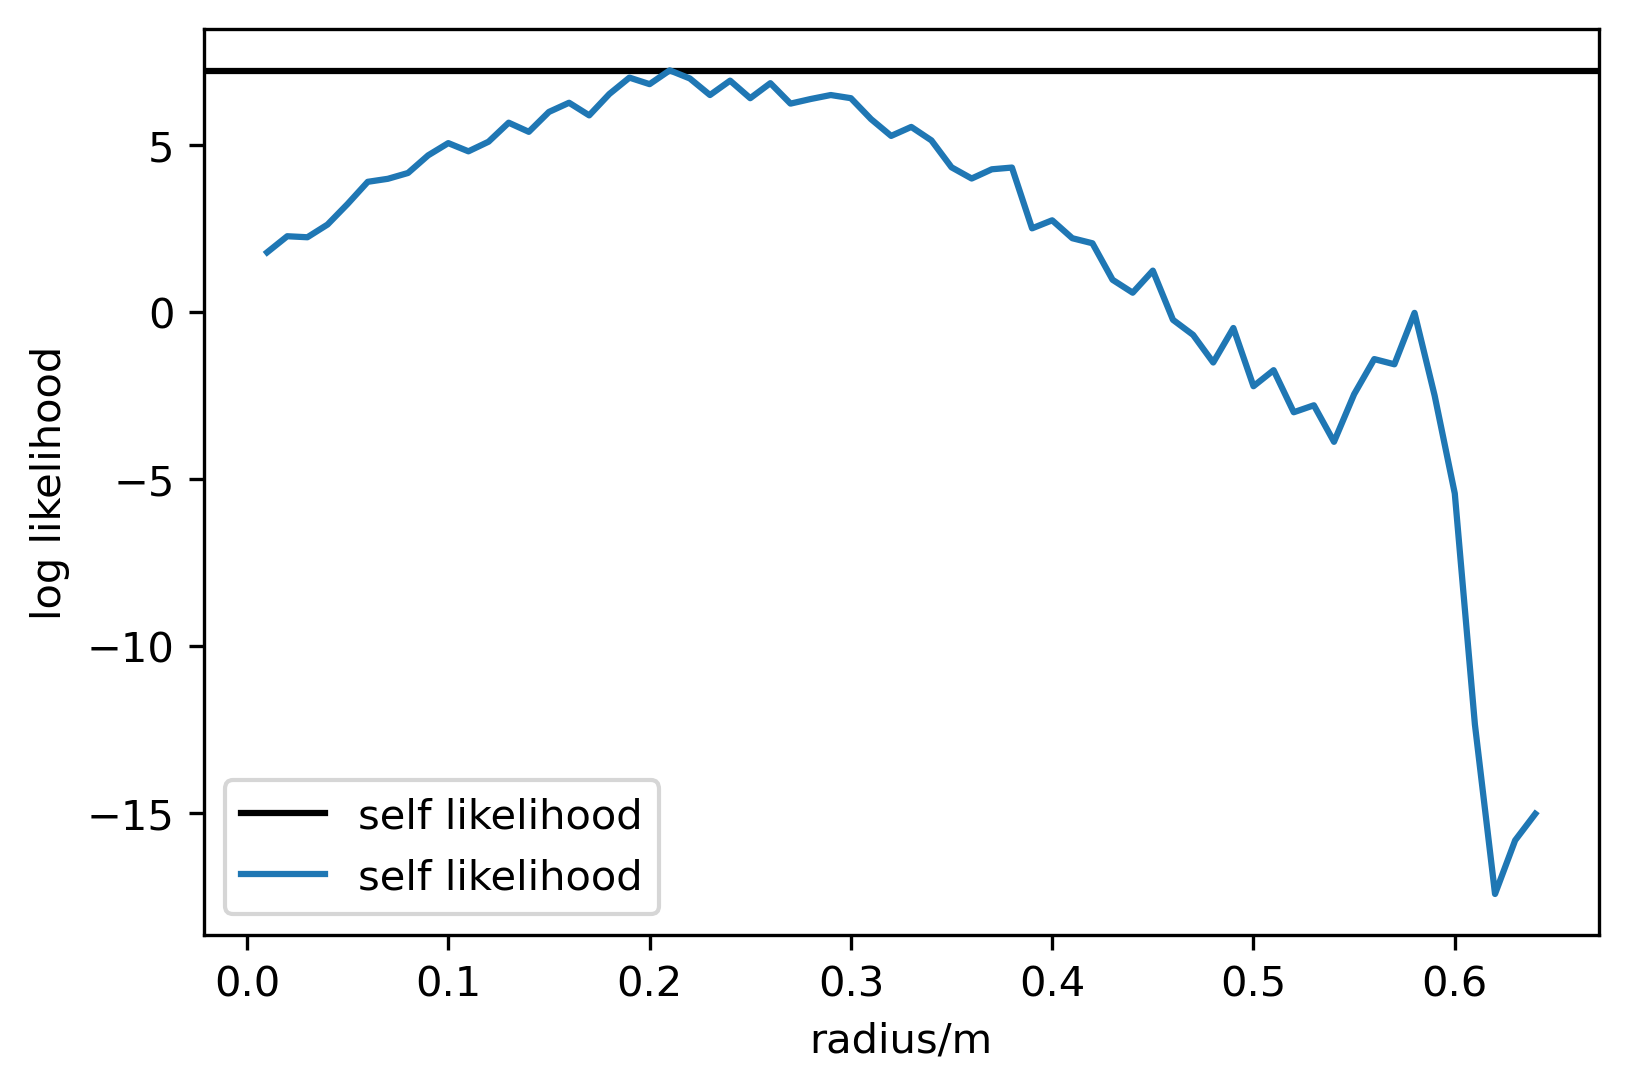

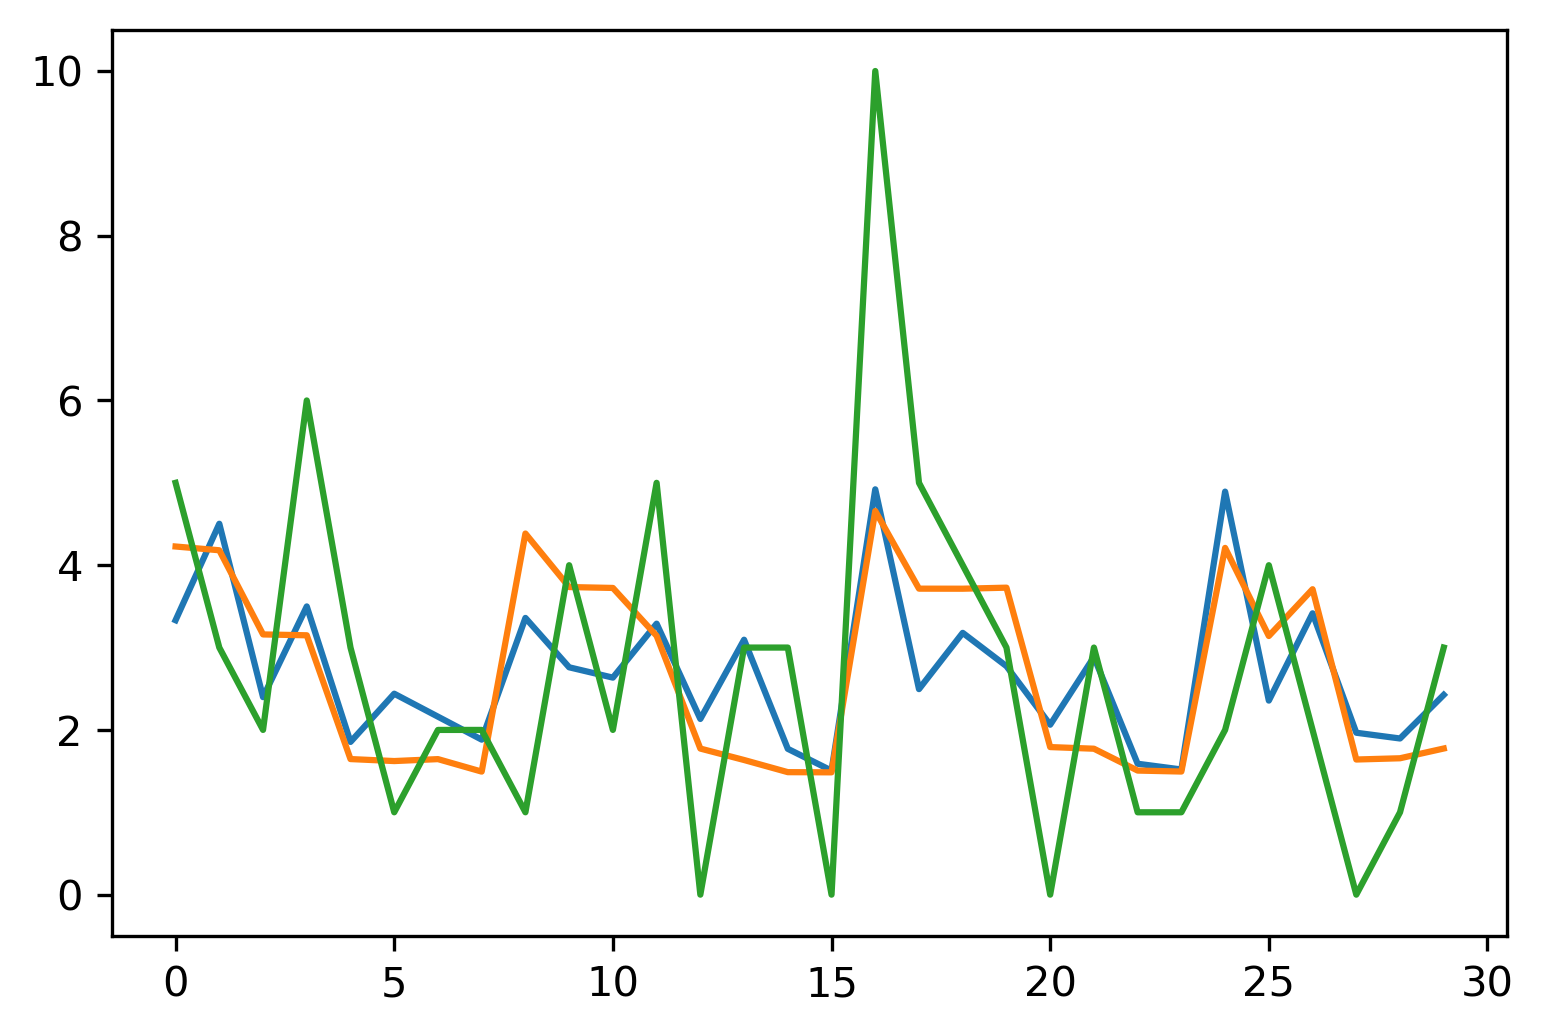

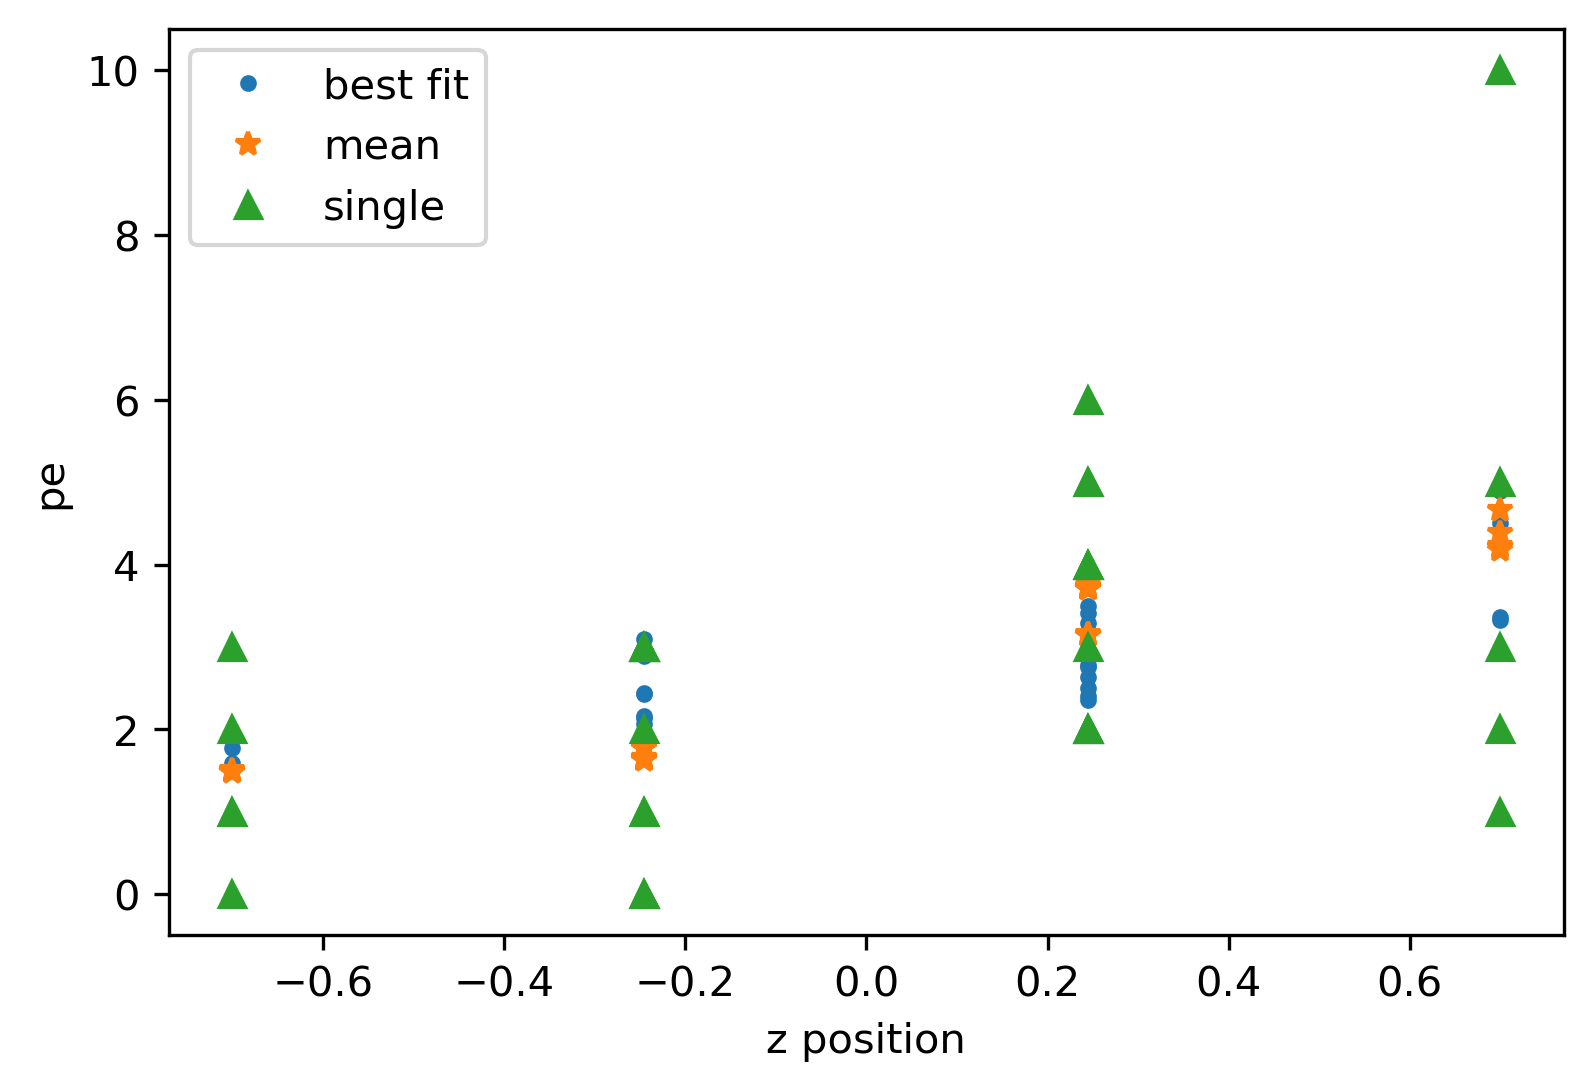

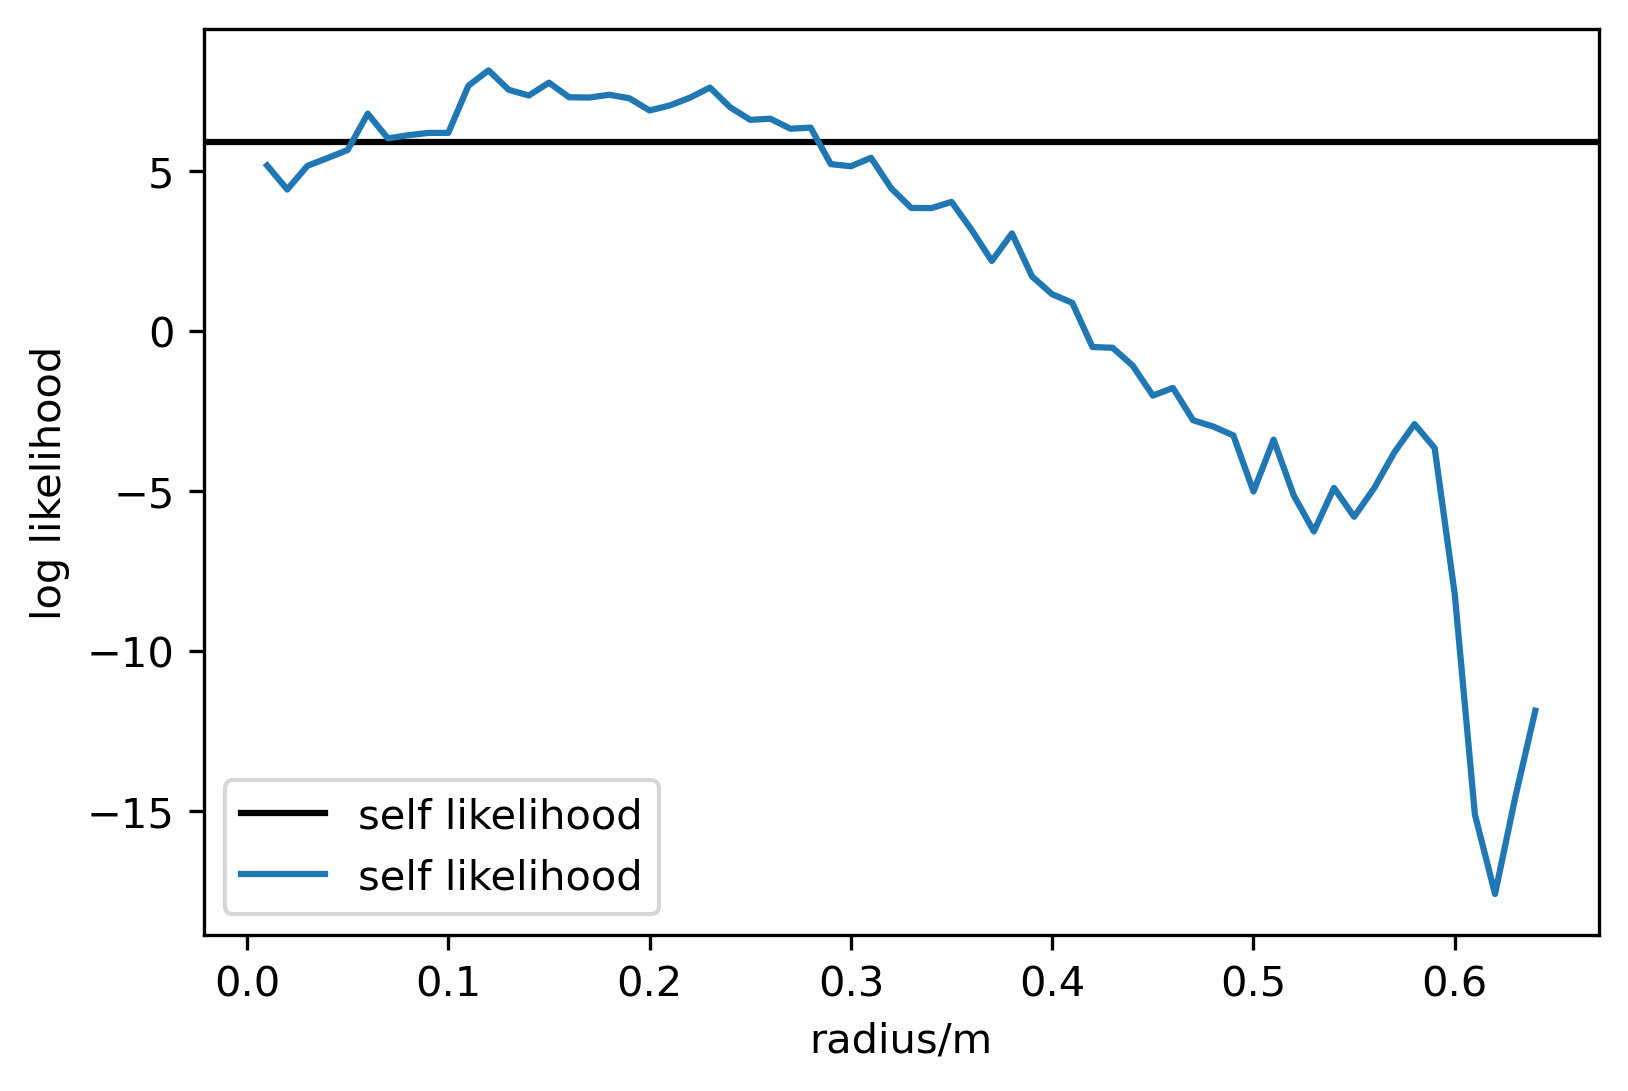

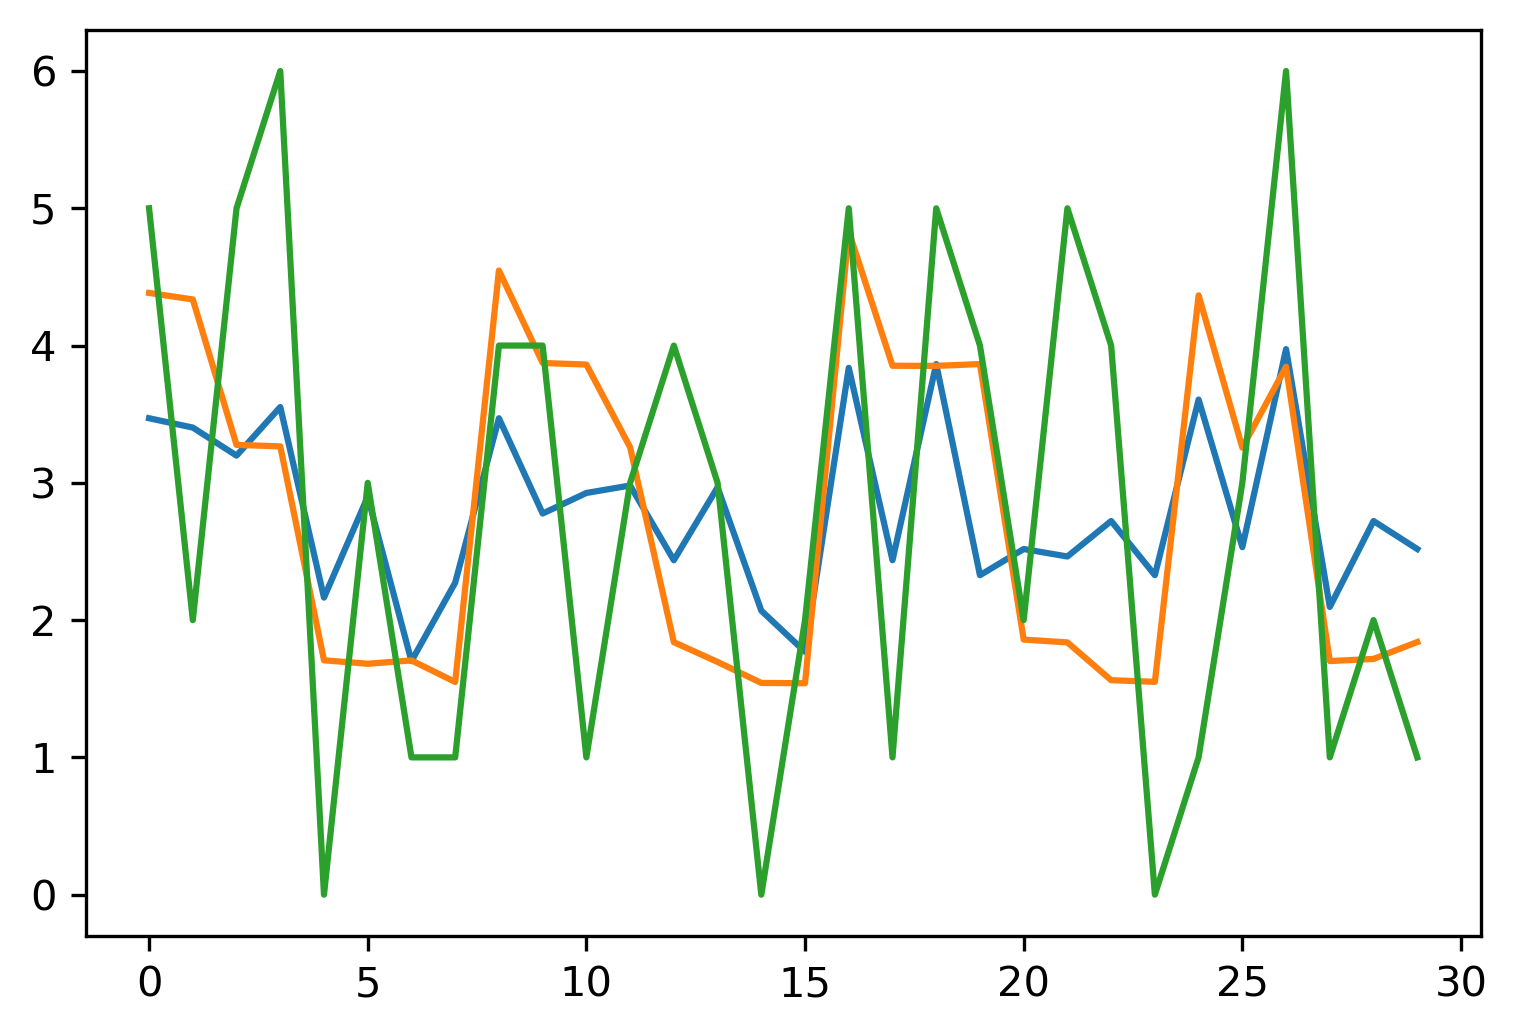

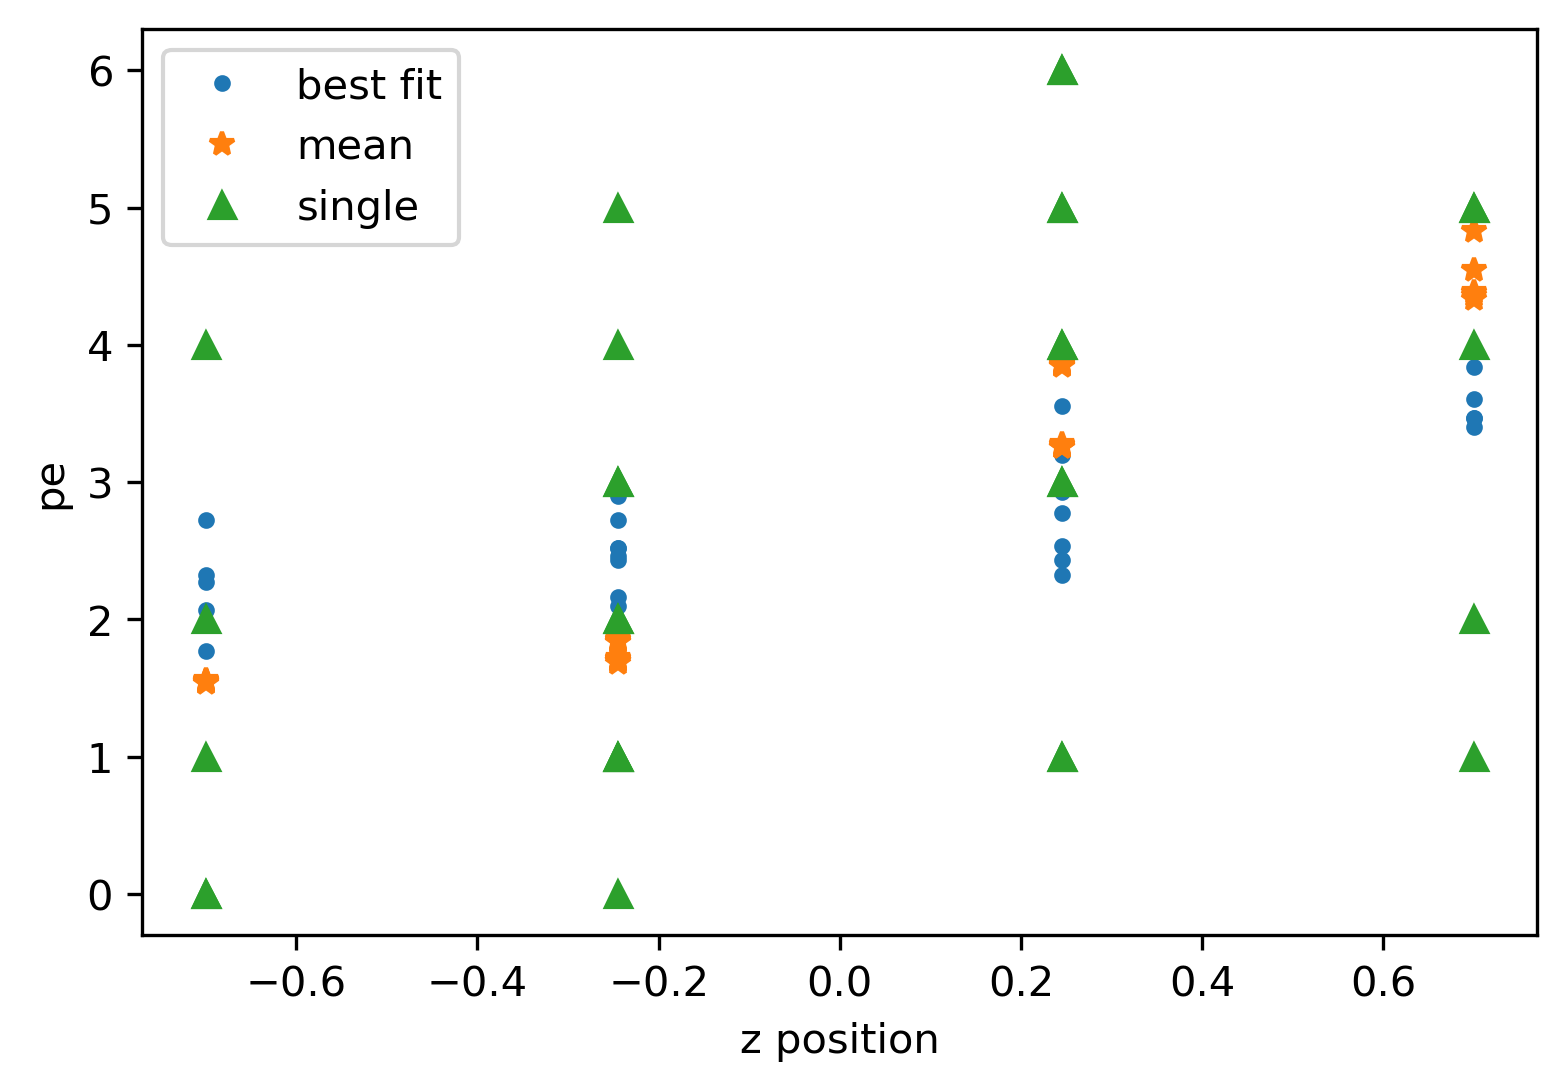

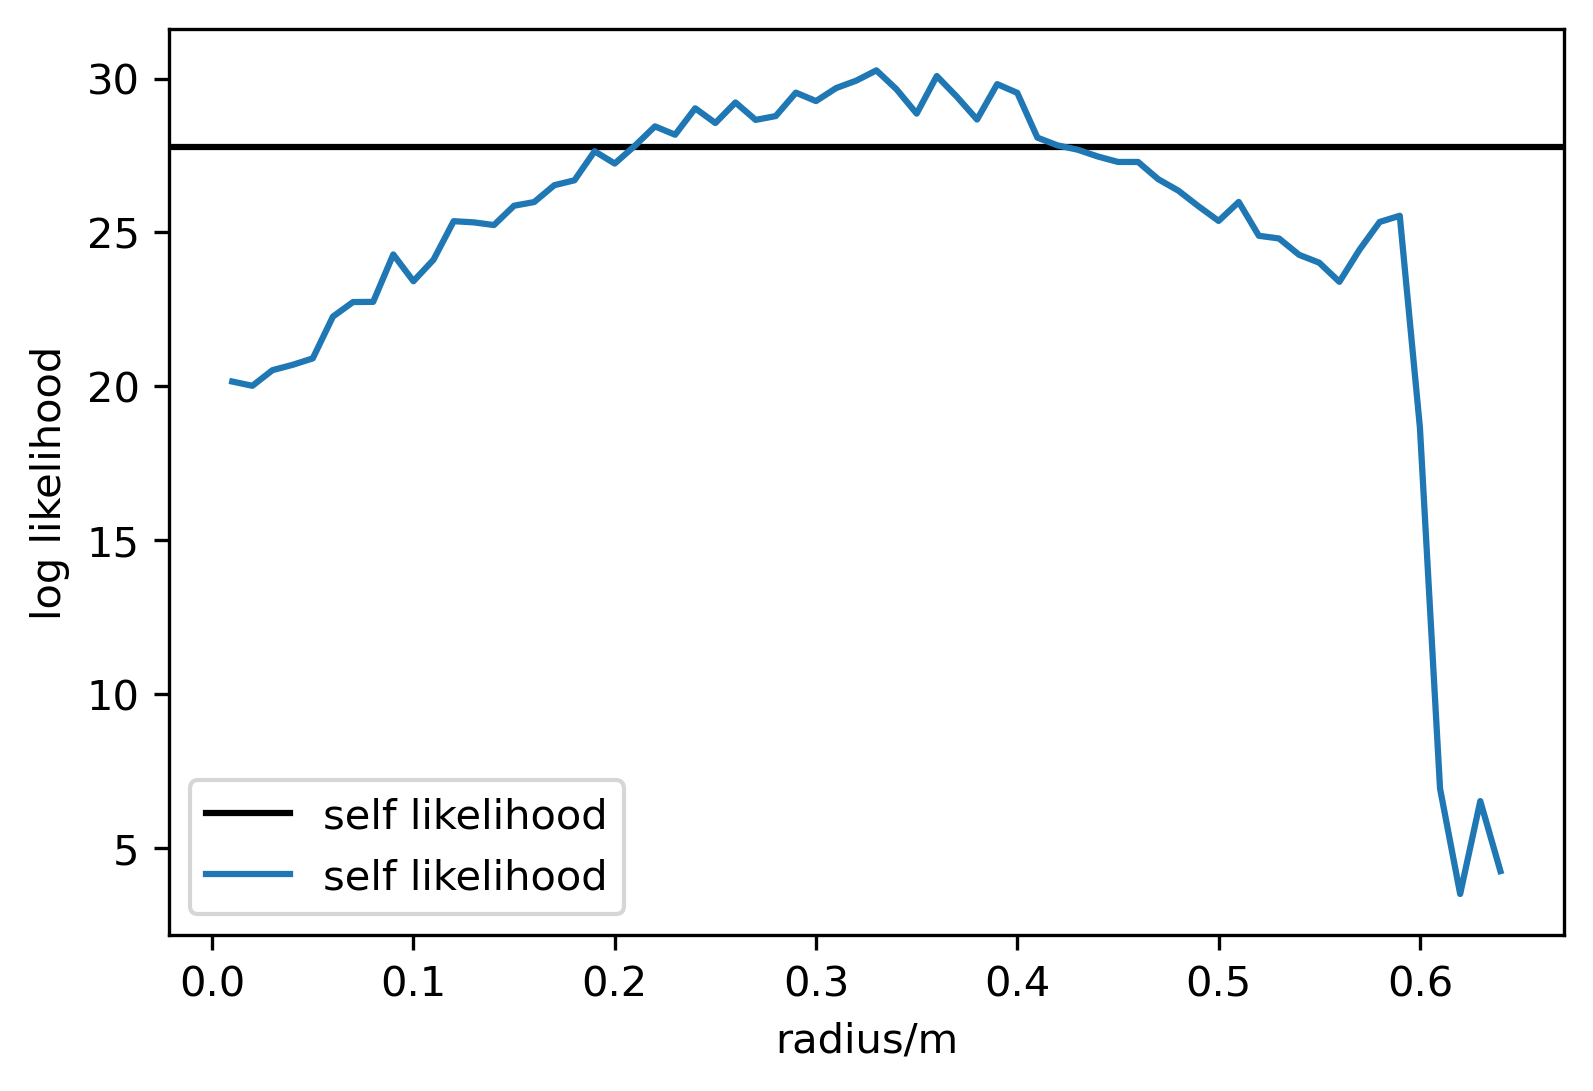

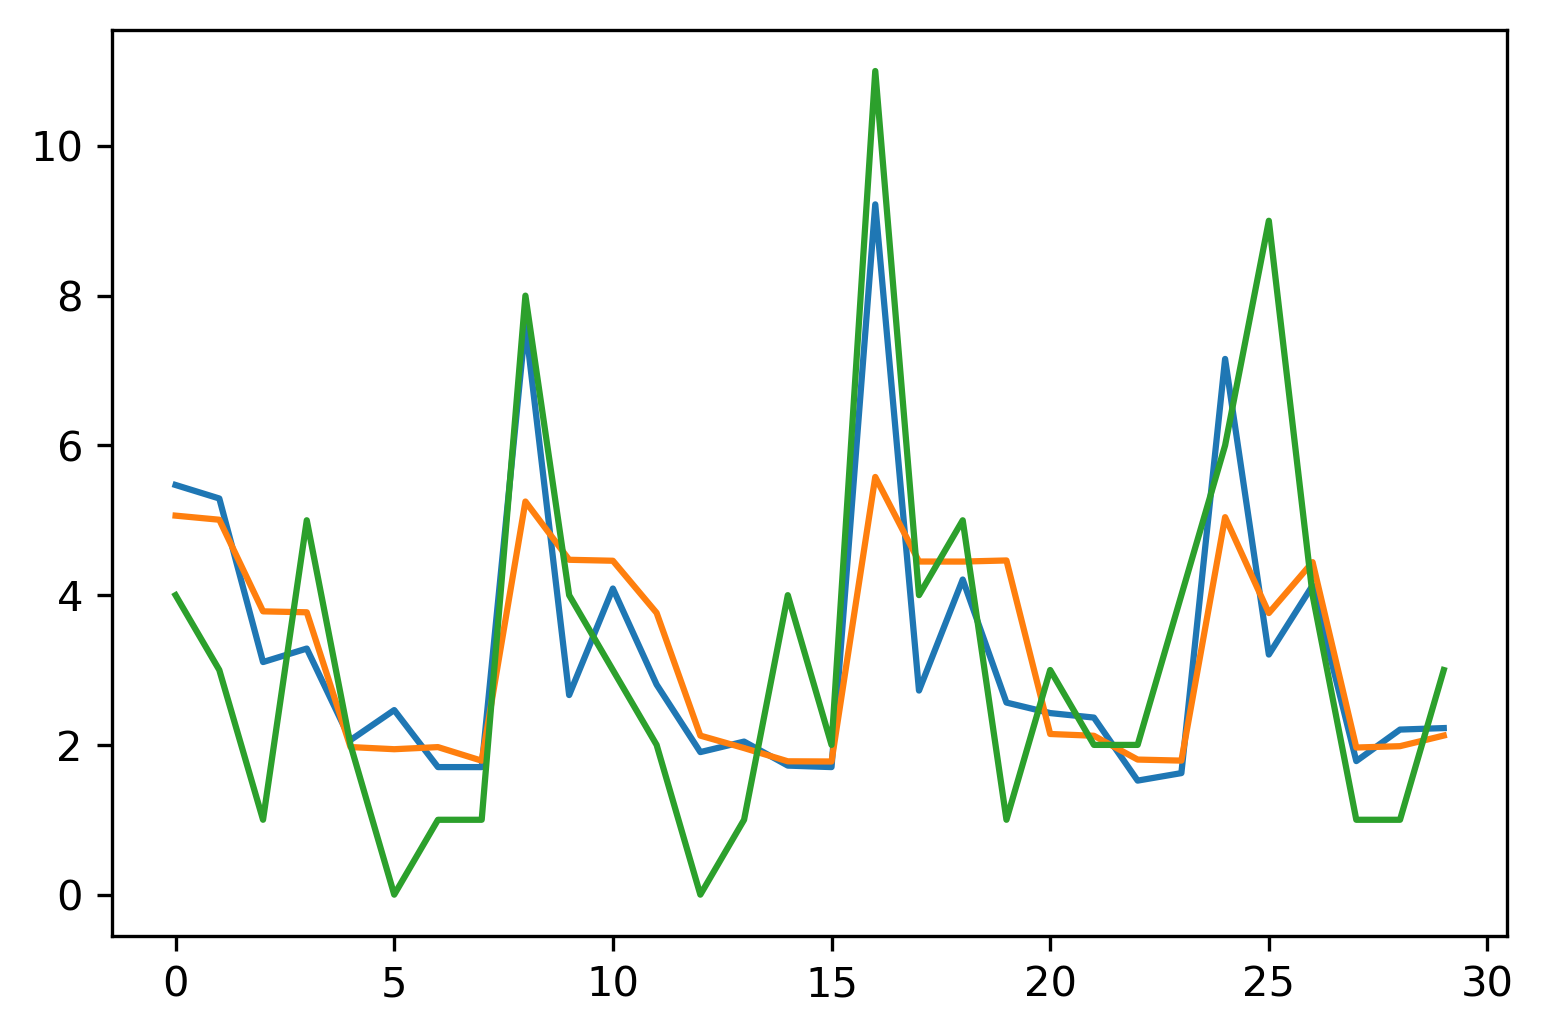

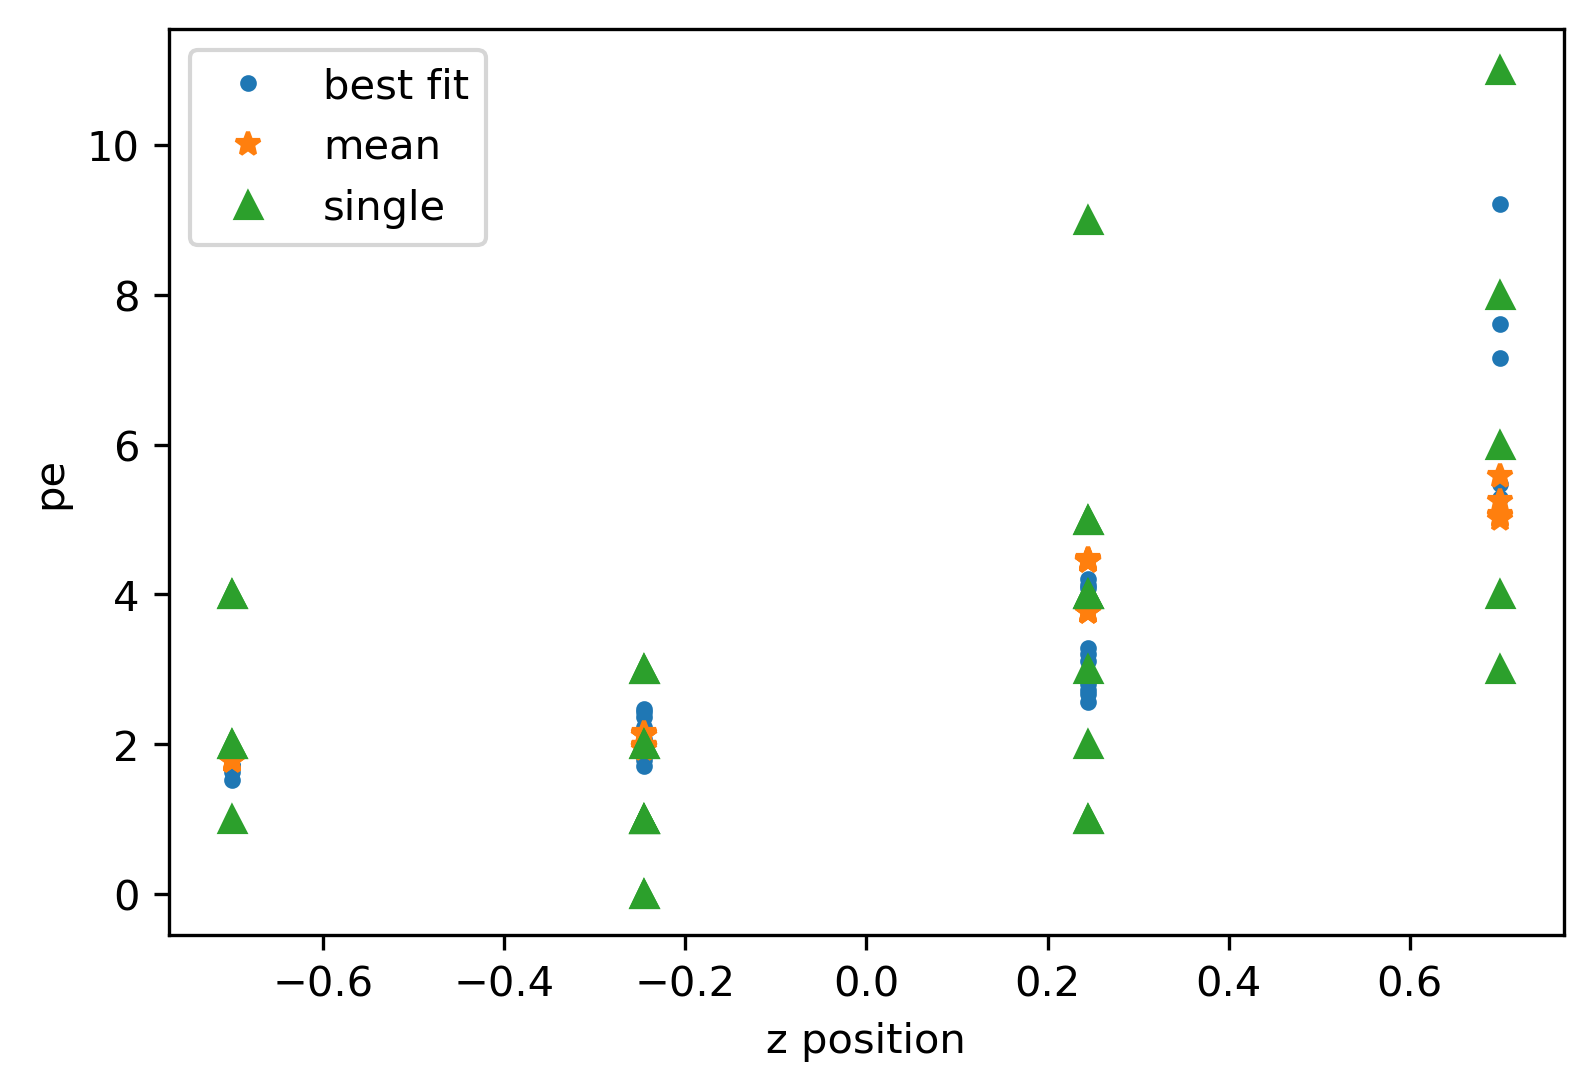

In [84]:
import tables
import numpy as np
import h5py

h1 = tables.open_file("./template.h5")
tp = h1.root.template[:]
bins = np.vstack((h1.root.x[:],h1.root.y[:], h1.root.z[:])).T
h1.close()

def ReadPMT():
    '''
    # Read PMT position
    # output: 2d PMT position 30*3 (x, y, z)
    '''
    f = open(r"../calib/PMT_1t.txt")
    line = f.readline()
    data_list = [] 
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    return PMT_pos

PMT_pos = ReadPMT()
#print(np.sum(np.isnan(np.sum(tp,axis=0))))
#exit()
def readfile(filename):
    '''
    # Read single file
    # input: filename [.h5]
    # output: EventID, ChannelID, x, y, z
    '''
    h1 = tables.open_file(filename,'r')
    print(filename, flush=True)
    truthtable = h1.root.GroundTruth
    EventID = truthtable[:]['EventID']
    ChannelID = truthtable[:]['ChannelID']
    
    x = h1.root.TruthData[:]['x']
    y = h1.root.TruthData[:]['y']
    z = h1.root.TruthData[:]['z']
    h1.close()
    
    # The following part is to avoid trigger by dn(dark noise) since threshold is 1
    # These thiggers will be recorded as (0,0,0) by uproot
    # but in root, the truth and the trigger is not one to one
    # If the simulation vertex is (0,0,0), it is ambiguous, so we need cut off (0,0,0) or use data without dn
    # If the simulation set -dn 0, whether the program will get into the following part is not tested
    
    dn = np.where((x==0) & (y==0) & (z==0))
    dn_index = (x==0) & (y==0) & (z==0)
    pin = dn[0] + np.min(EventID)
    if(np.sum(x**2+y**2+z**2>0.1)>0):
        cnt = 0        
        for ID in np.arange(np.min(EventID), np.max(EventID)+1):
            if ID in pin:
                cnt = cnt+1
                #print('Trigger No:', EventID[EventID==ID])
                #print('Fired PMT', ChannelID[EventID==ID])
                
                ChannelID = ChannelID[~(EventID == ID)]
                EventID = EventID[~(EventID == ID)]
        x = x[~dn_index]
        y = y[~dn_index]
        z = z[~dn_index]
    return (EventID, ChannelID, x, y, z)
    
def readchain(radius, path, axis):
    '''
    # This program is to read series files
    # Since root file will recorded as 'filename.root', if too large, it will use '_n' as suffix
    # input: radius: %+.3f, 'str'
    #        path: file storage path, 'str'
    #        axis: 'x' or 'y' or 'z', 'str'
    # output: the gathered result EventID, ChannelID, x, y, z
    '''
    for i in np.arange(0, 5):
        if(i == 0):
            # filename = path + '1t_' + radius + '.h5'
            # eg: /mnt/stage/douwei/Simulation/1t_root/2.0MeV_xyz/1t_+0.030.h5
            filename = '%s1t_%s_%sQ.h5' % (path, radius, axis)
            EventID, ChannelID, x, y, z = readfile(filename)
        else:
            try:
                # filename = path + '1t_' + radius + '_n.h5'
                # eg: /mnt/stage/douwei/Simulation/1t_root/2.0MeV_xyz/1t_+0.030_1.h5
                filename = '%s1t_%s_%s_%dQ.h5' % (path, radius, axis, i)
                EventID1, ChannelID1, x1, y1, z1 = readfile(filename)
                EventID = np.hstack((EventID, EventID1))
                ChannelID = np.hstack((ChannelID, ChannelID1))
                x = np.hstack((x, x1))
                y = np.hstack((y, y1))
                z = np.hstack((z, z1))
            except:
                pass

    return EventID, ChannelID, x, y, z

def main(path, radius, axis, sign='+'):
    EventIDx, ChannelIDx, xx, yx, zx = readchain(sign + radius, path, axis)
    x1 = np.array((xx[0], yx[0], zx[0]))
    size = np.size(np.unique(EventIDx))

    EventID = EventIDx
    ChannelID = ChannelIDx

    total = np.zeros((size,3))
    print('total event: %d' % np.size(np.unique(EventID)), flush=True)
    
    data = tp
    a1 = np.empty((0))
    for i in np.arange(3):
        if (i == 0):
            h = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/ground_axis/1t_+0.600_zQ.h5')
        else:
            h = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/ground_axis/1t_+0.600_z_%dQ.h5' % i)
        a1 = np.hstack((a1,h.root.PETruthData[:]['Q']))
        h.close()
    print(np.array(a1))
    for k_index, k in enumerate(np.unique(EventID)):
        if not k_index % 1e3:
            print('preprocessing %d-th event' % k_index, flush=True)
        hit = ChannelID[EventID == k]
        tabulate = np.bincount(hit)
        event_pe = np.zeros(30)
        # tabulate begin with 0
        event_pe[0:np.size(tabulate)] = tabulate
        
        rep = np.tile(event_pe,(np.size(bins[:,0]),1))
        real_sum = np.sum(data, axis=1)
        corr = (data.T/(real_sum/np.sum(event_pe))).T
        L = np.nansum(-corr + np.log(corr)*event_pe, axis=1)
        test = np.mean(np.reshape(a1, (-1,30),order='C'), axis=0)
        test = test/(np.sum(test)/np.sum(event_pe))
        h.close()
        L_test = np.nansum(-test + np.log(test)*event_pe)
        index = np.where(L == np.max(L))[0][0]
        L1 = np.reshape(L[0:-1],(-1,64), order='F')
        plt.figure(dpi=300)
        plt.axhline(L_test,color='black',label='self likelihood')
        plt.plot(np.linspace(0.01,0.64,64),np.max(L1, axis=0),label='self likelihood')
        plt.legend()
        plt.xlabel('radius/m')
        plt.ylabel('log likelihood')
        plt.figure(dpi=300)
        plt.plot(corr[index])
        plt.plot(test)
        plt.plot(event_pe)
        plt.figure(dpi=300)
        plt.plot(PMT_pos[:,2], corr[index],'.', label='best fit')
        plt.plot(PMT_pos[:,2], test,'*',label='mean')
        plt.plot(PMT_pos[:,2], event_pe,'^',label='single')
        plt.legend()
        plt.xlabel('z position')
        plt.ylabel('pe')
        if(k_index==10):
            print(haha)

main('/mnt/stage/douwei/Simulation/1t_root/ground_axis/','0.600', 'z', '+')

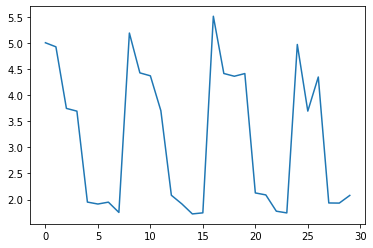

In [43]:
h = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/ground_axis/1t_+0.600_zQ.h5')
plt.plot(np.mean(np.reshape(h.root.PETruthData[:]['Q'], (-1,30),order='C'), axis=0))

In [67]:
PMT_pos

NameError: name 'PMT_pos' is not defined